In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy 
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [3]:
data=pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

In [5]:
datatrainset, datatestset =train_test_split(data,test_size=0.2,random_state=0)

In [7]:
datatrainset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18159 entries, 252 to 2732
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             18159 non-null  int64  
 1   VendorID               18159 non-null  int64  
 2   tpep_pickup_datetime   18159 non-null  object 
 3   tpep_dropoff_datetime  18159 non-null  object 
 4   passenger_count        18159 non-null  int64  
 5   trip_distance          18159 non-null  float64
 6   RatecodeID             18159 non-null  int64  
 7   store_and_fwd_flag     18159 non-null  object 
 8   PULocationID           18159 non-null  int64  
 9   DOLocationID           18159 non-null  int64  
 10  payment_type           18159 non-null  int64  
 11  fare_amount            18159 non-null  float64
 12  extra                  18159 non-null  float64
 13  mta_tax                18159 non-null  float64
 14  tip_amount             18159 non-null  float64
 15  tolls_

In [669]:
datatrainset.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
252,31150737,2,04/16/2017 11:08:31 PM,04/16/2017 11:24:44 PM,1,6.02,1,N,229,168,2,19.5,0.5,0.5,0.00,0.0,0.3,20.80
16220,33778519,2,04/24/2017 6:52:50 AM,04/24/2017 6:55:51 AM,1,0.66,1,N,249,114,1,4.5,0.0,0.5,1.00,0.0,0.3,6.30
9795,43955786,1,05/21/2017 2:36:49 AM,05/21/2017 2:42:24 AM,2,1.40,1,N,114,231,1,6.5,0.5,0.5,1.00,0.0,0.3,8.80
1972,2275196,1,01/09/2017 4:38:25 PM,01/09/2017 4:43:11 PM,1,0.50,1,N,75,236,1,5.0,1.0,0.5,0.00,0.0,0.3,6.80
21092,52138948,1,06/19/2017 6:45:25 PM,06/19/2017 6:54:12 PM,1,1.00,1,N,163,142,1,7.5,1.0,0.5,1.85,0.0,0.3,11.15


In [673]:
datatrainset.shape

(18159, 18)

In [675]:
datatrainset.columns

Index(['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount'],
      dtype='object')

In [65]:
pd.set_option('display.float_format', '{:.2f}'.format)
datatrainset.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00
mean,56743482.37,1.56,1.65,2.91,1.05,162.48,161.86,1.34,13.04,0.33,0.50,1.85,0.32,0.30,16.34
std,32807522.26,0.50,1.29,3.67,0.78,66.75,70.12,0.50,13.78,0.46,0.04,2.91,1.42,0.02,16.74
min,16803.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,-120.00,-1.00,-0.50,0.00,0.00,-0.30,-120.30
25%,28216951.00,1.00,1.00,0.98,1.00,114.00,113.00,1.00,6.50,0.00,0.50,0.00,0.00,0.30,8.58
50%,56804905.00,2.00,1.00,1.60,1.00,162.00,162.00,1.00,9.50,0.00,0.50,1.36,0.00,0.30,11.80
75%,85368354.50,2.00,2.00,3.05,1.00,233.00,233.00,2.00,14.50,0.50,0.50,2.45,0.00,0.30,17.80
max,113486300.00,2.00,6.00,33.92,99.00,265.00,265.00,4.00,999.99,4.50,0.50,200.00,19.10,0.30,1200.29


#### Problèmes Identifiés

- Valeurs négatives (fare_amount, total_amount) : Remboursements ou erreurs.

- Valeurs extrêmes (RatecodeID=99, fare_amount=999.99) : Probables anomalies.

- Données manquantes : Toutes les colonnes ont 18 159 lignes (count), donc pas de NaN ici.

## Types de données

In [679]:
datatrainset.dtypes

Unnamed: 0                 int64
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [54]:
# Afficher le nombre de colonnes par type
print("Types de données :\n\n", datatrainset.dtypes.value_counts())

Types de données :

 float64    8
int64      7
object     3
Name: count, dtype: int64


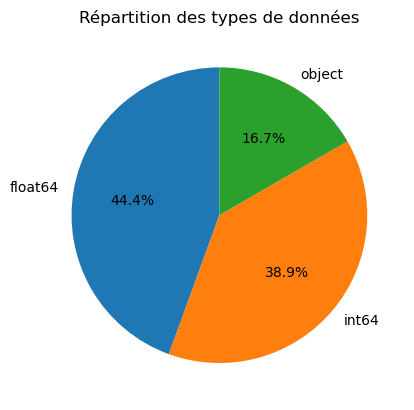

In [56]:
datatrainset.dtypes.value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Répartition des types de données")
plt.ylabel("")  
plt.show()

## Données manquantes (même si complètes, c'est bien de le confirmer !)

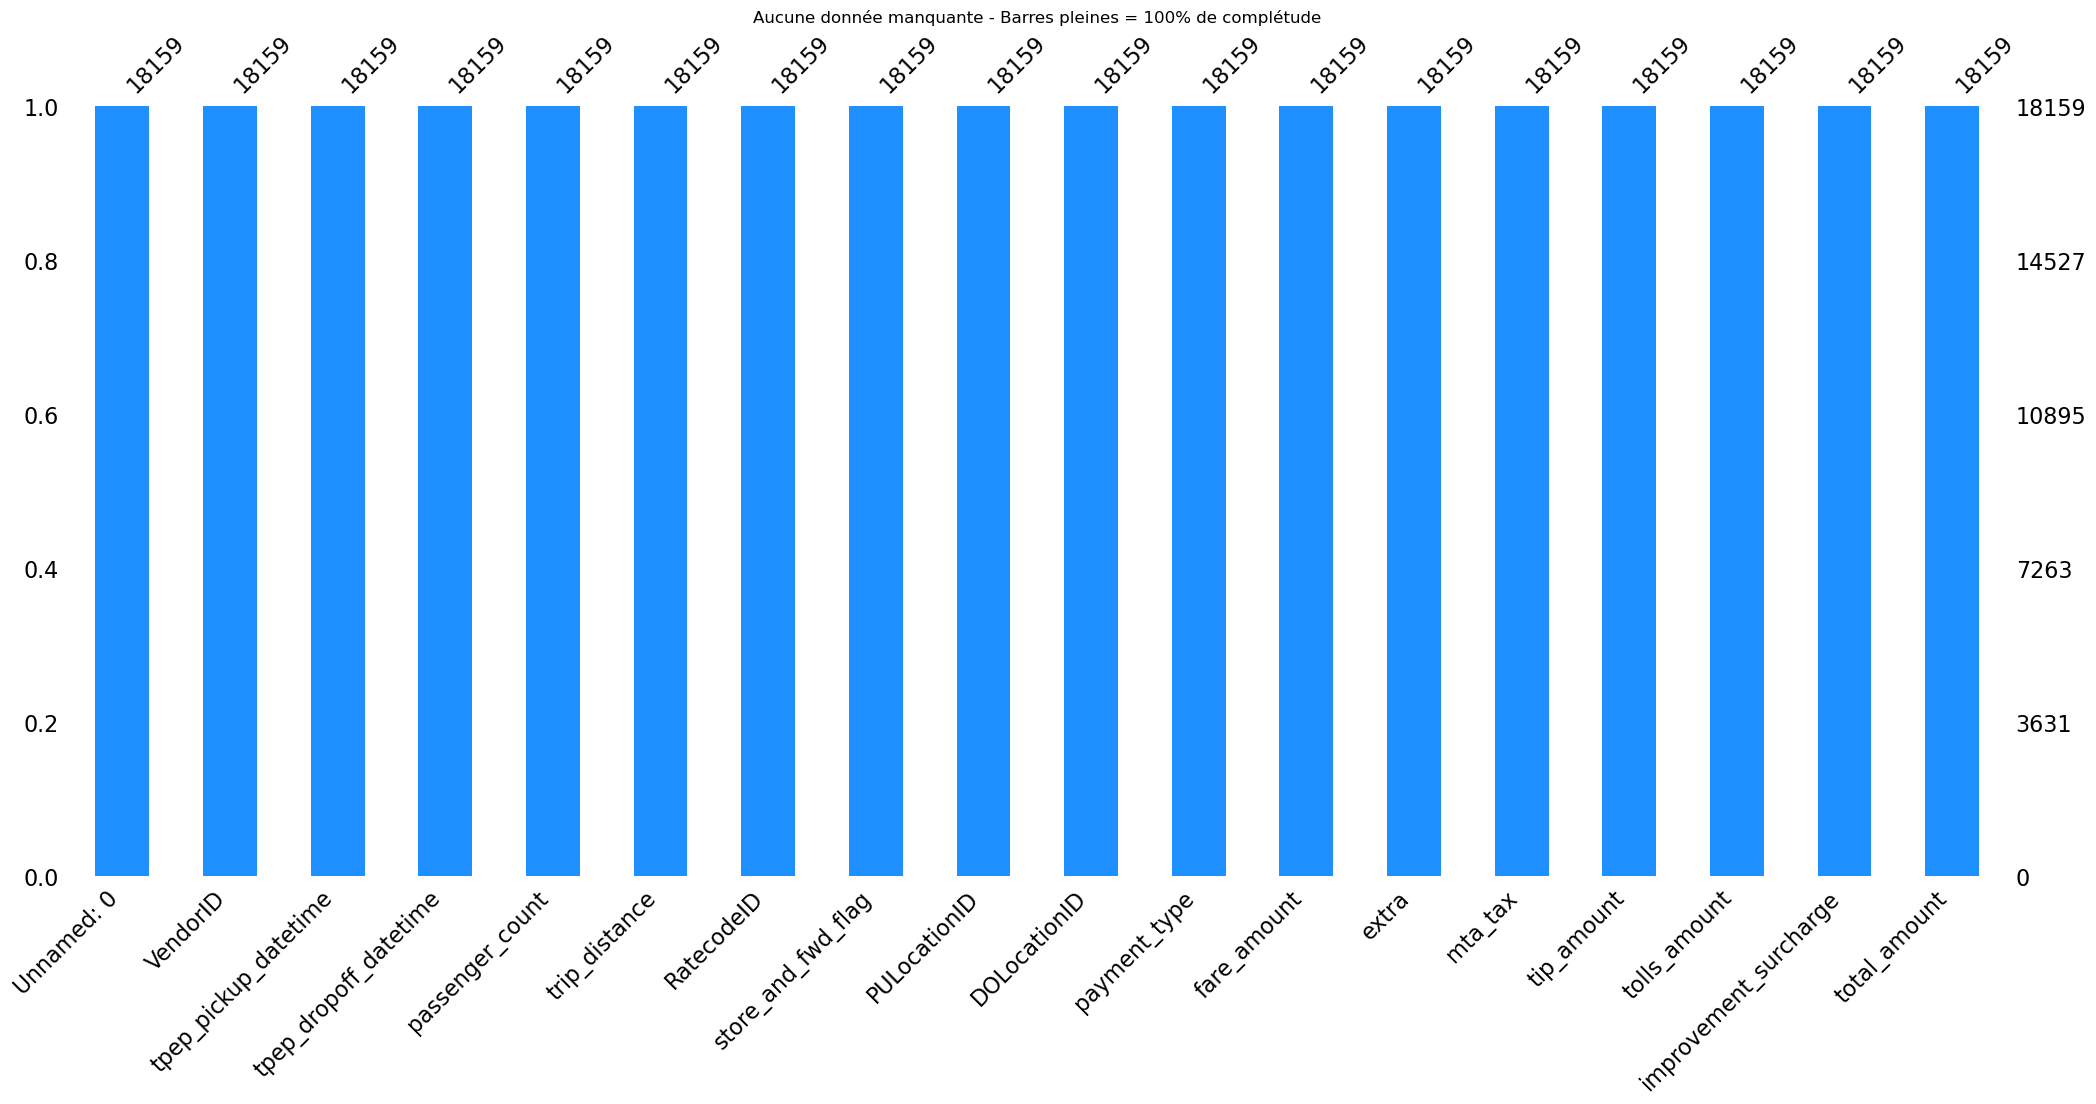

In [76]:
import missingno as msno
msno.bar(datatrainset, color="dodgerblue")
plt.title("Aucune donnée manquante - Barres pleines = 100% de complétude")
plt.show()

- Les barres sont toutes pleines (100%) → Aucune donnée manquante

In [21]:
# plt.figure(figsize=(10,10))
# sns.heatmap(datatrainset.isna(),cbar=False)

In [25]:
# !pip install missingno

<Axes: >

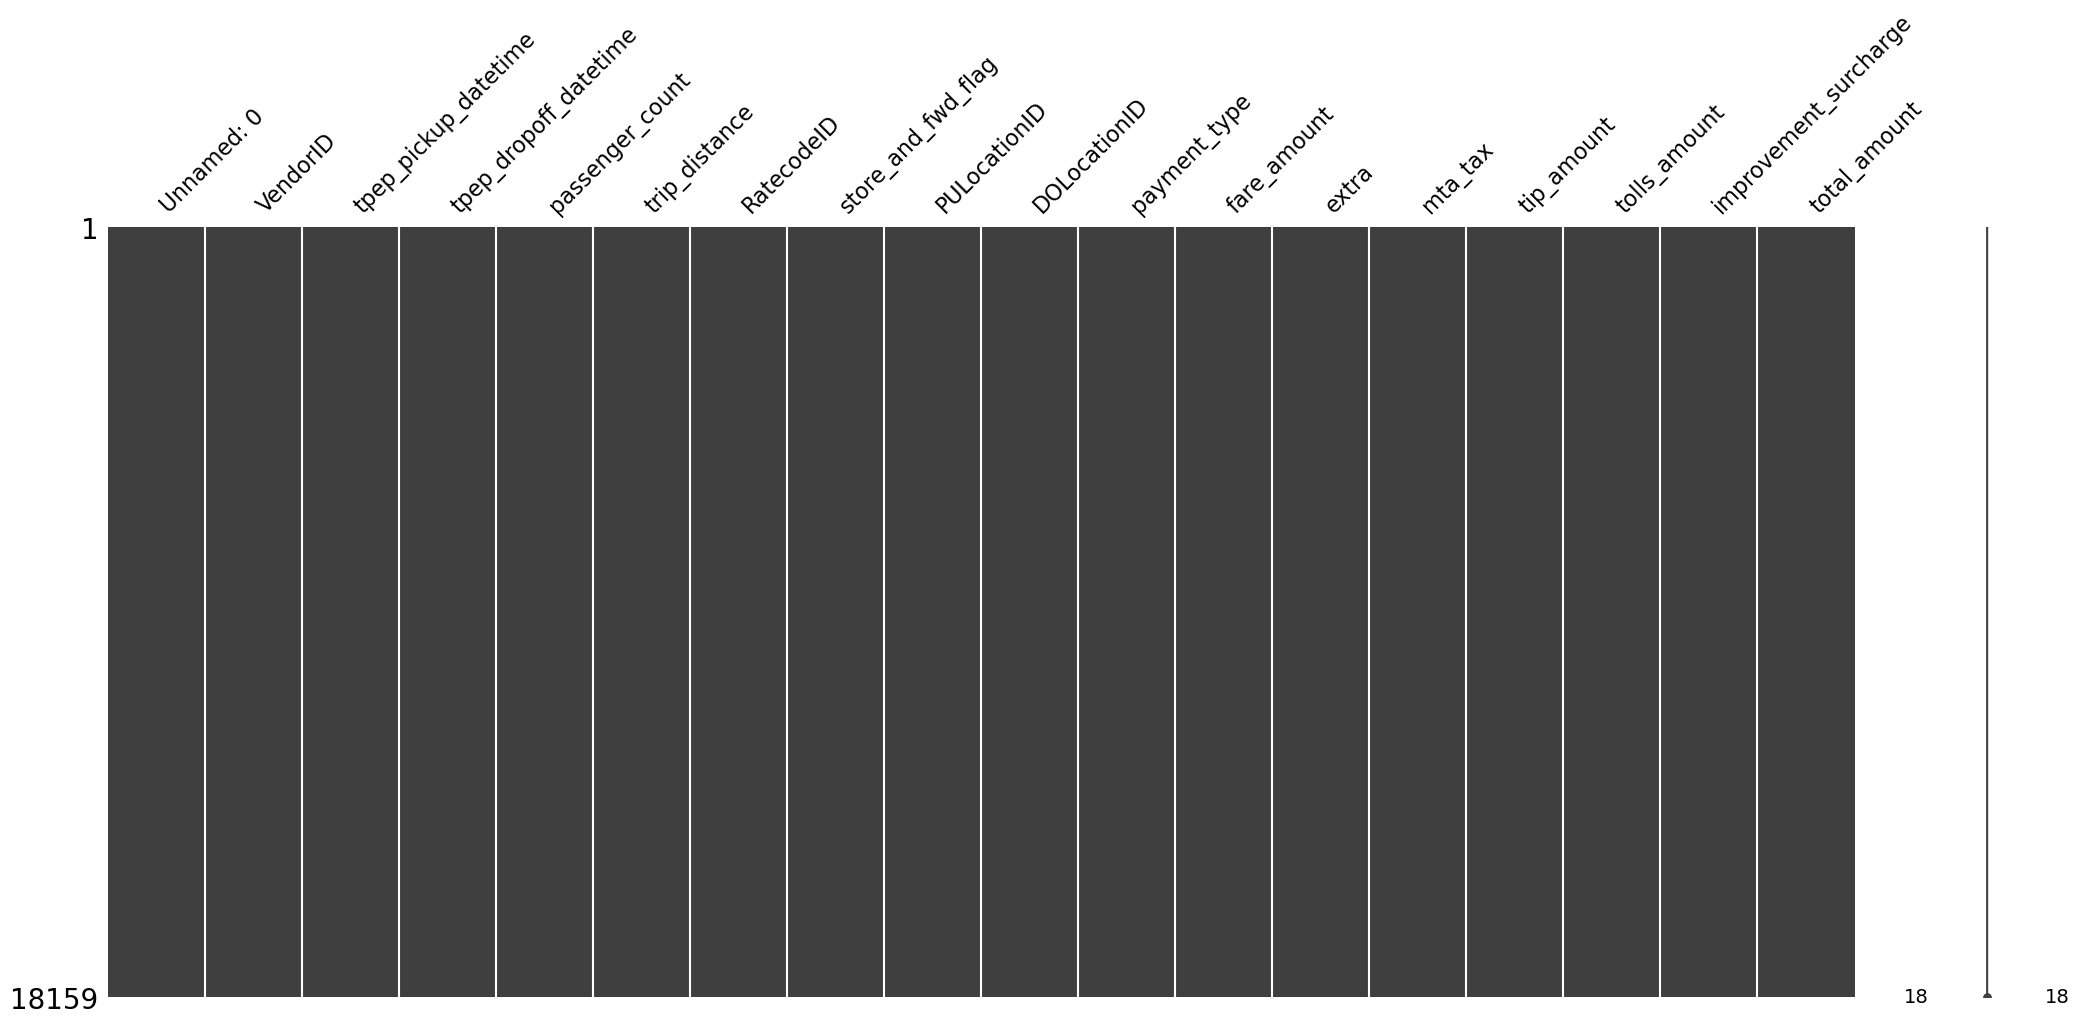

In [84]:
msno.matrix(datatrainset)

- Tout est noir donc 100% de données remplies et pas de NaN

  

## Distribution des features

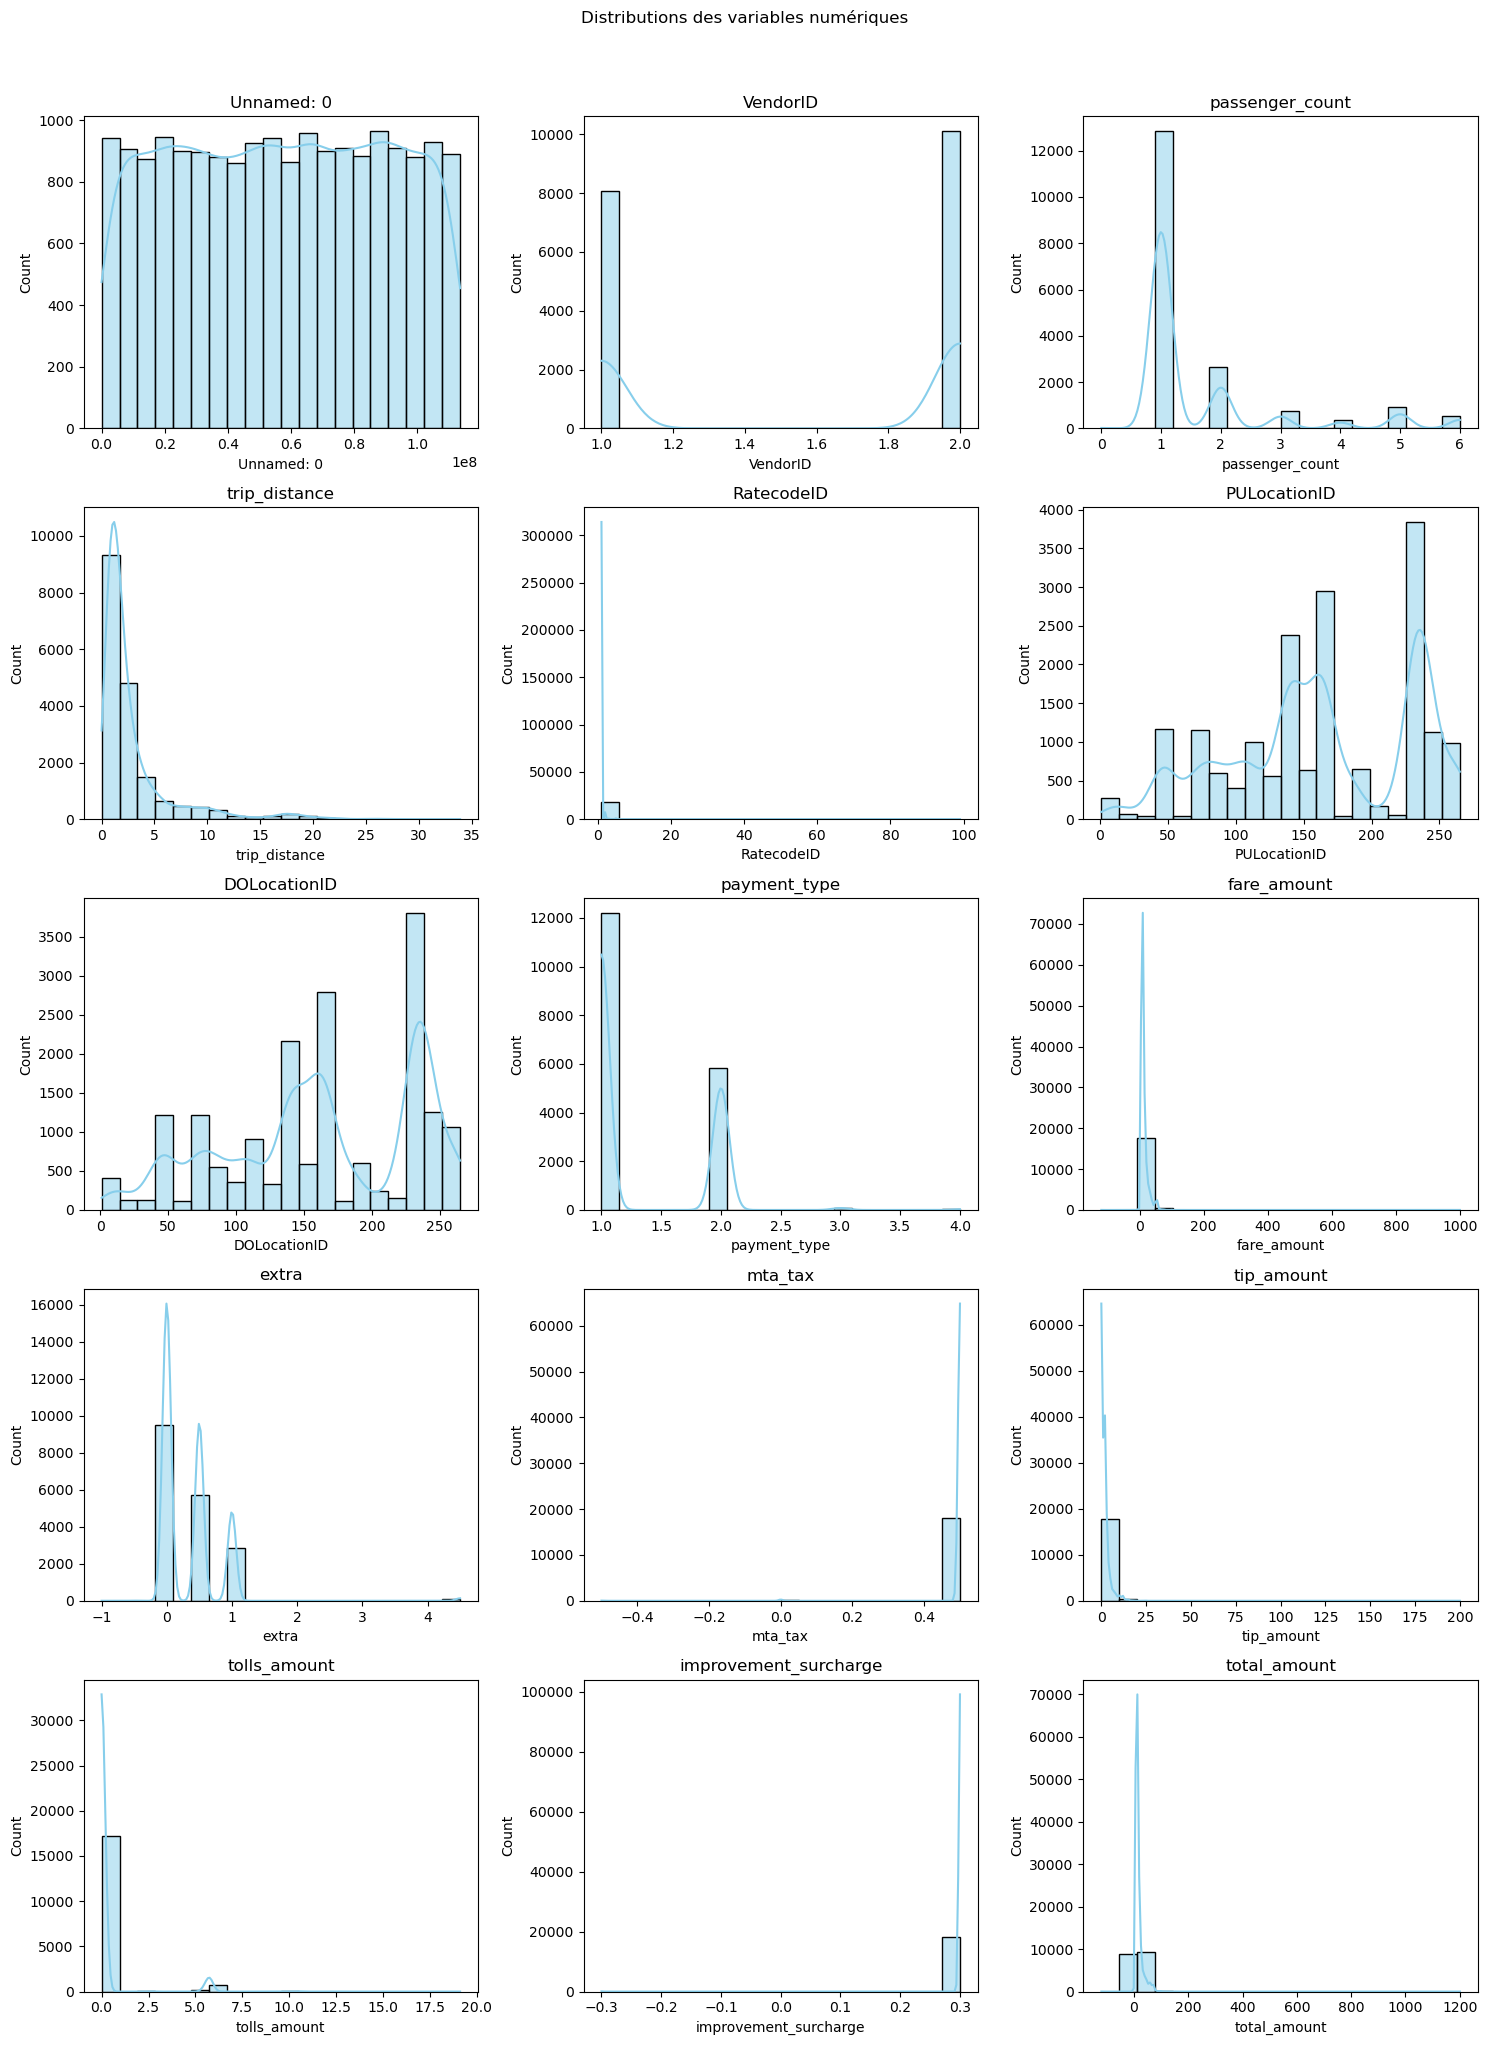

In [135]:
colonnes_numeriques = datatrainset.select_dtypes(include=['float64', 'int64']).columns
n_colonnes = len(colonnes_numeriques)

n_lignes = (n_colonnes // 3) + (1 if n_colonnes % 3 != 0 else 0)

fig, axs = plt.subplots(n_lignes, 3, figsize=(15, n_lignes * 4))
fig.suptitle("Distributions des variables numériques", y=1.02)

# Boucle pour remplir les subplots
for i, colonne in enumerate(colonnes_numeriques):
    ligne = i // 3  
    colonne_plot = i % 3  # Colonne (0, 1, ou 2)
    
    
    sns.histplot(
        datatrainset[colonne], 
        bins=20, 
        color='skyblue', 
        ax=axs[ligne, colonne_plot], 
        edgecolor='black', 
        kde=True
    )
    axs[ligne, colonne_plot].set_title(colonne)

# Masquer les subplots vides 
for j in range(i + 1, n_lignes * 3):
    ligne = j // 3
    colonne_plot = j % 3
    axs[ligne, colonne_plot].axis('off')

plt.tight_layout()
plt.show()

- Pour qu'une distribution soit équilibrée, il est nécessaire que toutes les distributions des variables (ou caractéristiques) suivent une distribution normale.

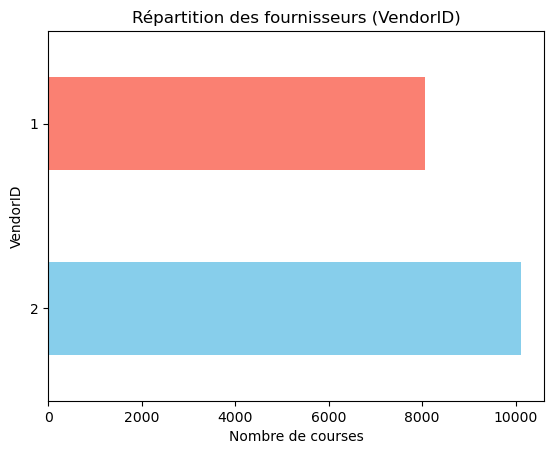

In [141]:

datatrainset['VendorID'].value_counts().plot.barh(color=['skyblue', 'salmon'])
plt.title("Répartition des fournisseurs (VendorID)")
plt.xlabel("Nombre de courses")
plt.show()

In [150]:
for colonne in datatrainset.columns:
    if datatrainset[colonne].nunique() < 10 and datatrainset[colonne].nunique() > 1:
        distrib = datatrainset[colonne].value_counts(normalize=True)
        desequilibre = distrib.iloc[0] / distrib.iloc[-1]  # Ratio classe majoritaire/minoritaire
        
        print(f"\n{colonne}:")
        print(distrib)
        
        if desequilibre > 5:
            print("⚠️ Déséquilibre extrême - SMOTE difficile")
        elif desequilibre > 2:
            print("✅ Bon candidat pour SMOTE")
        else:
            print("⏹ Équilibre correct - Pas besoin de SMOTE")


VendorID:
VendorID
2   0.56
1   0.44
Name: proportion, dtype: float64
⏹ Équilibre correct - Pas besoin de SMOTE

passenger_count:
passenger_count
1   0.71
2   0.15
5   0.05
3   0.04
6   0.03
4   0.02
0   0.00
Name: proportion, dtype: float64
⚠️ Déséquilibre extrême - SMOTE difficile

RatecodeID:
RatecodeID
1    0.97
2    0.02
5    0.00
3    0.00
4    0.00
99   0.00
Name: proportion, dtype: float64
⚠️ Déséquilibre extrême - SMOTE difficile

store_and_fwd_flag:
store_and_fwd_flag
N   1.00
Y   0.00
Name: proportion, dtype: float64
⚠️ Déséquilibre extrême - SMOTE difficile

payment_type:
payment_type
1   0.67
2   0.32
3   0.01
4   0.00
Name: proportion, dtype: float64
⚠️ Déséquilibre extrême - SMOTE difficile

extra:
extra
0.00    0.52
0.50    0.31
1.00    0.16
4.50    0.00
-0.50   0.00
-1.00   0.00
Name: proportion, dtype: float64
⚠️ Déséquilibre extrême - SMOTE difficile

mta_tax:
mta_tax
0.50    1.00
0.00    0.00
-0.50   0.00
Name: proportion, dtype: float64
⚠️ Déséquilibre extrême - S

# Création de la Variable Cible (is_generous)

- On créons is_generous pour comprendre les comportements de pourboire (ex: "Quels groupes donnent 20%+ ?").

In [155]:
# Calcul du pourcentage de pourboire par rapport au total_amount
datatrainset['tip_percentage'] = (datatrainset['tip_amount'] / datatrainset['total_amount']) * 100

# Variable binaire : 1 si pourboire ≥ 20%, sinon 0
datatrainset['is_generous'] = (datatrainset['tip_percentage'] >= 20).astype(int)

# Vérification de l'équilibre
print(datatrainset['is_generous'].value_counts(normalize=True))

is_generous
0   0.91
1   0.09
Name: proportion, dtype: float64


## Analyse Univariée de la Target (is_generous)

C:\Users\HP\AppData\Local\Temp\ipykernel_7892\640312760.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=datatrainset, x='is_generous', palette=['skyblue', 'salmon'])


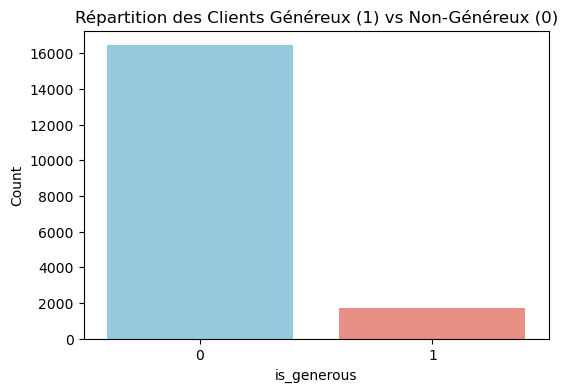

is_generous
0   0.91
1   0.09
Name: proportion, dtype: float64


In [162]:
# Distribution de la target
plt.figure(figsize=(6, 4))
sns.countplot(data=datatrainset, x='is_generous', palette=['skyblue', 'salmon'])
plt.title("Répartition des Clients Généreux (1) vs Non-Généreux (0)")
plt.xlabel("is_generous")
plt.ylabel("Count")
plt.show()

# Stats de base
print(datatrainset['is_generous'].value_counts(normalize=True))

## Analyse Bivariée (Croisements avec Target)

### Pour les variables catégorielles 


🔹 VendorID vs is_generous:
 is_generous     0     1
VendorID               
1           91.91  8.09
2           89.52 10.48


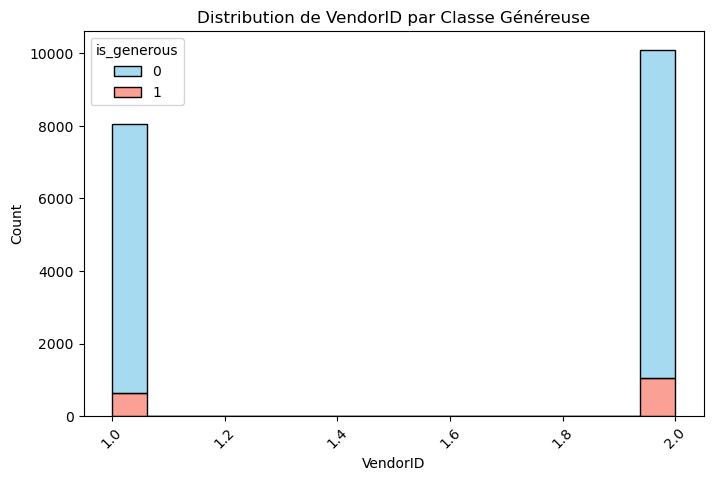


🔹 passenger_count vs is_generous:
 is_generous         0     1
passenger_count            
0               96.30  3.70
1               90.29  9.71
2               91.82  8.18
3               92.09  7.91
4               92.02  7.98
5               89.82 10.18
6               89.15 10.85


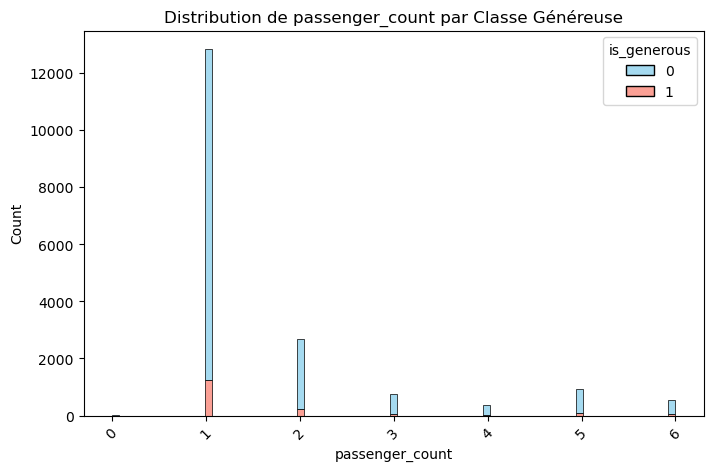


🔹 RatecodeID vs is_generous:
 is_generous      0    1
RatecodeID             
1            90.55 9.45
2            90.62 9.38
3            96.97 3.03
4           100.00 0.00
5            94.55 5.45
99          100.00 0.00


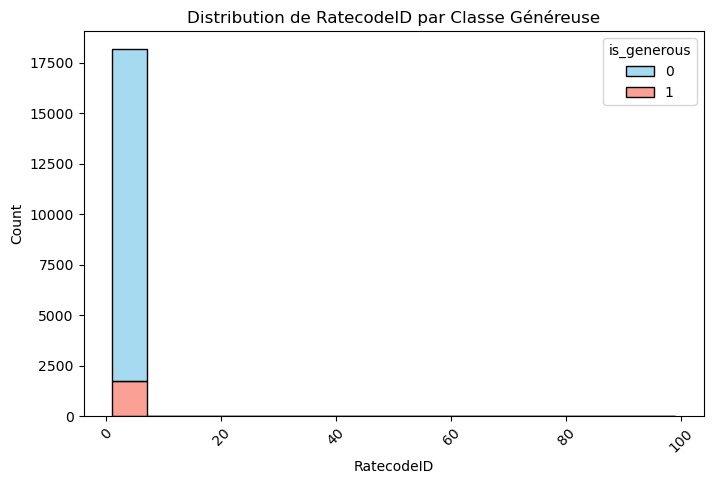


🔹 store_and_fwd_flag vs is_generous:
 is_generous            0    1
store_and_fwd_flag           
N                  90.56 9.44
Y                  95.24 4.76


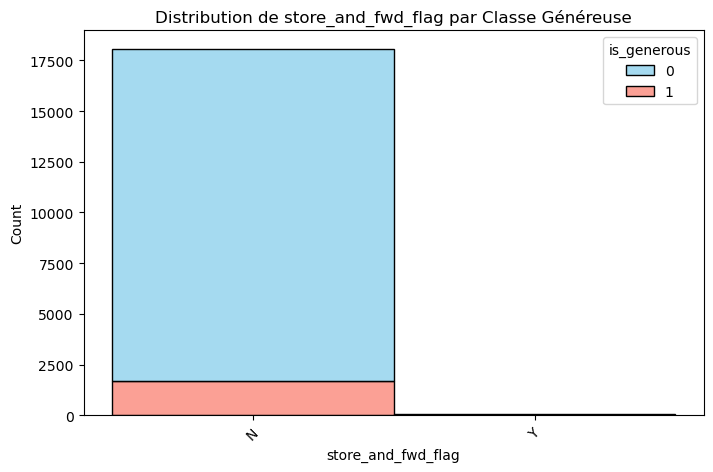


🔹 payment_type vs is_generous:
 is_generous       0     1
payment_type             
1             85.98 14.02
2            100.00  0.00
3            100.00  0.00
4            100.00  0.00


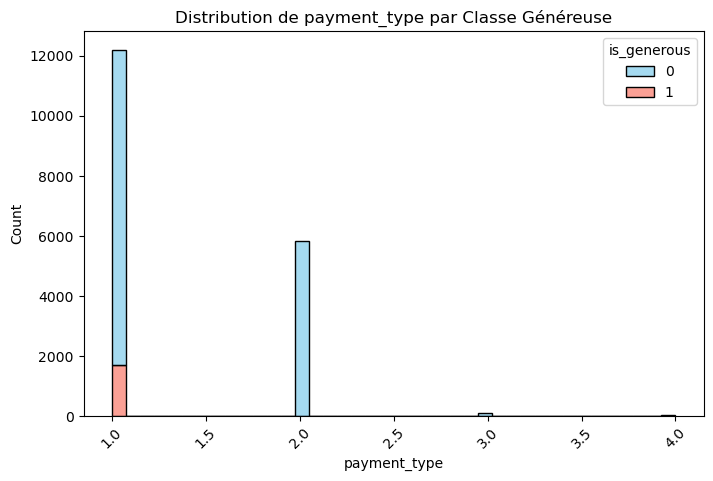

In [169]:
for col in datatrainset.select_dtypes(include=['object', 'category', 'int64']).columns:
    if datatrainset[col].nunique() < 10:  # Éviter les colonnes à trop de modalités
        # Tableau croisé %
        cross_tab = pd.crosstab(datatrainset[col], datatrainset['is_generous'], normalize='index') * 100
        print(f"\n🔹 {col} vs is_generous:\n", cross_tab)

        # Visualisation
        plt.figure(figsize=(8, 5))
        sns.histplot(data=datatrainset, x=col, hue='is_generous', multiple='stack', palette=['skyblue', 'salmon'])
        plt.title(f"Distribution de {col} par Classe Généreuse")
        plt.xticks(rotation=45)
        plt.show()

# Insights et Actions par Variable  

## 📊 1. VendorID vs is_generous  
**Insight :**  
Les clients du VendorID 2 sont légèrement plus généreux (10.48% vs 8.09% pour VendorID 1).  

**Action :**  
Conserver cette variable pour la modélisation → Peut aider à prédire la générosité.  

---  

## 👥 2. passenger_count vs is_generous  
**Insight :**  
Les courses avec 6 passagers ont le taux de générosité le plus élevé (10.85%), suivies de 5 passagers (10.18%).  
Les courses sans passager (0) sont très rares et peu généreuses (3.70%).  

**Actions :**  
Regrouper les catégories pour simplifier :  
- 0 passager → Supprimer (erreur de données ?).  
- 1-2 passagers → "Petit groupe".  
- 3+ passagers → "Gros groupe".  

---  

## 🚖 3. RatecodeID vs is_generous  
**Insight :**  
La plupart des courses sont en RatecodeID 1 (standard), avec un taux de générosité moyen (9.45%).  
Les RatecodeID 4 et 99 n'ont aucun pourboire ≥ 20% (valeurs aberrantes ?).  

**Actions :**  
- Supprimer les RatecodeID 4 et 99 (taux à 0%).  
- Fusionner les autres catégories (< 5% de générosité) en une classe "Autres".  

---  

## 🏷️ 4. store_and_fwd_flag vs is_generous  
**Insight :**  
La colonne est presque constante (99% de 'N'), avec un faible impact sur la générosité.  
Les rares courses 'Y' sont moins généreuses (4.76% vs 9.44%).  

**Action :**  
Supprimer la colonne (peu informative pour le modèle).  

---  

## 💳 5. payment_type vs is_generous  
**Insight :**  
Seul le paiement par carte (1) a des pourboires ≥ 20% (14.02%).  
Les autres modes (2=Espèces, 3, 4) n'ont aucun pourboire généreux.  

**Actions :**  
Encoder en variable binaire :  
- `is_card_payment = 1` si `payment_type == 1`, sinon 0.  
Supprimer les autres types (taux à 0%).  

##  Analyse des Corrélations

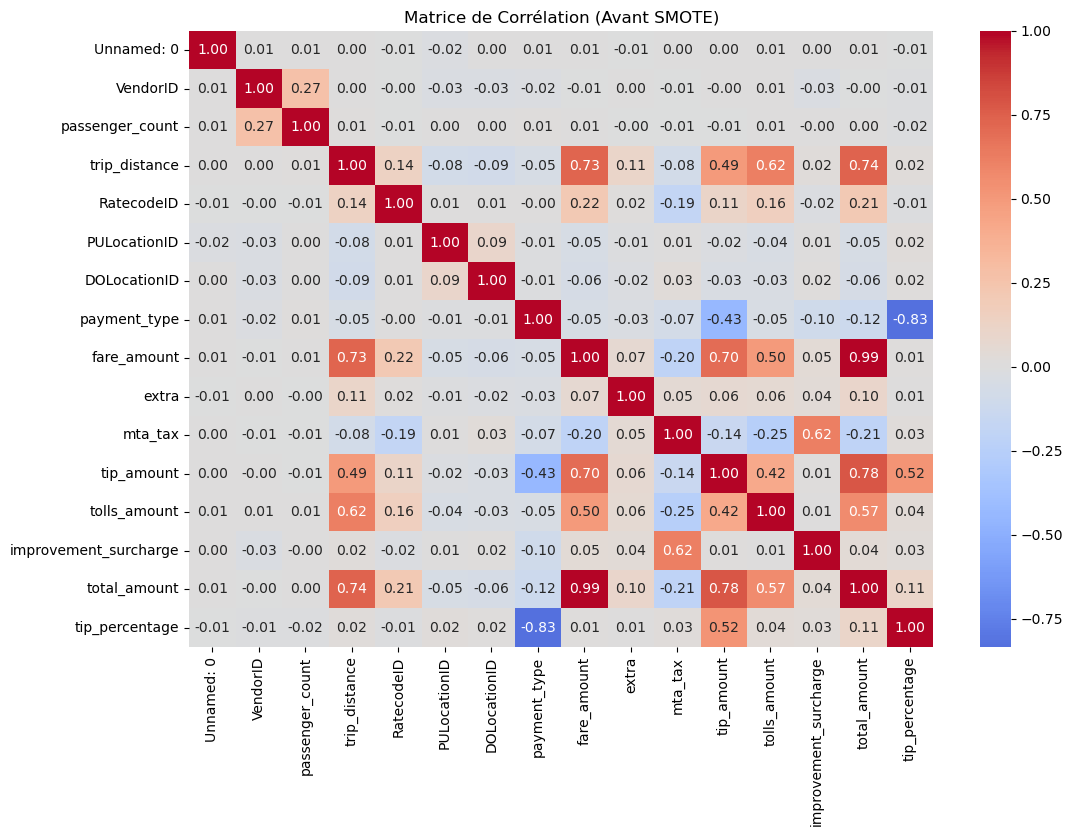

In [173]:
corr_matrix = datatrainset.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Matrice de Corrélation (Avant SMOTE)")
plt.show()

## Analyse des outliers 

In [234]:
colonnes_numeriques = datatrainset.select_dtypes(include=['object']).columns
colonnes_numeriques

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag'], dtype='object')

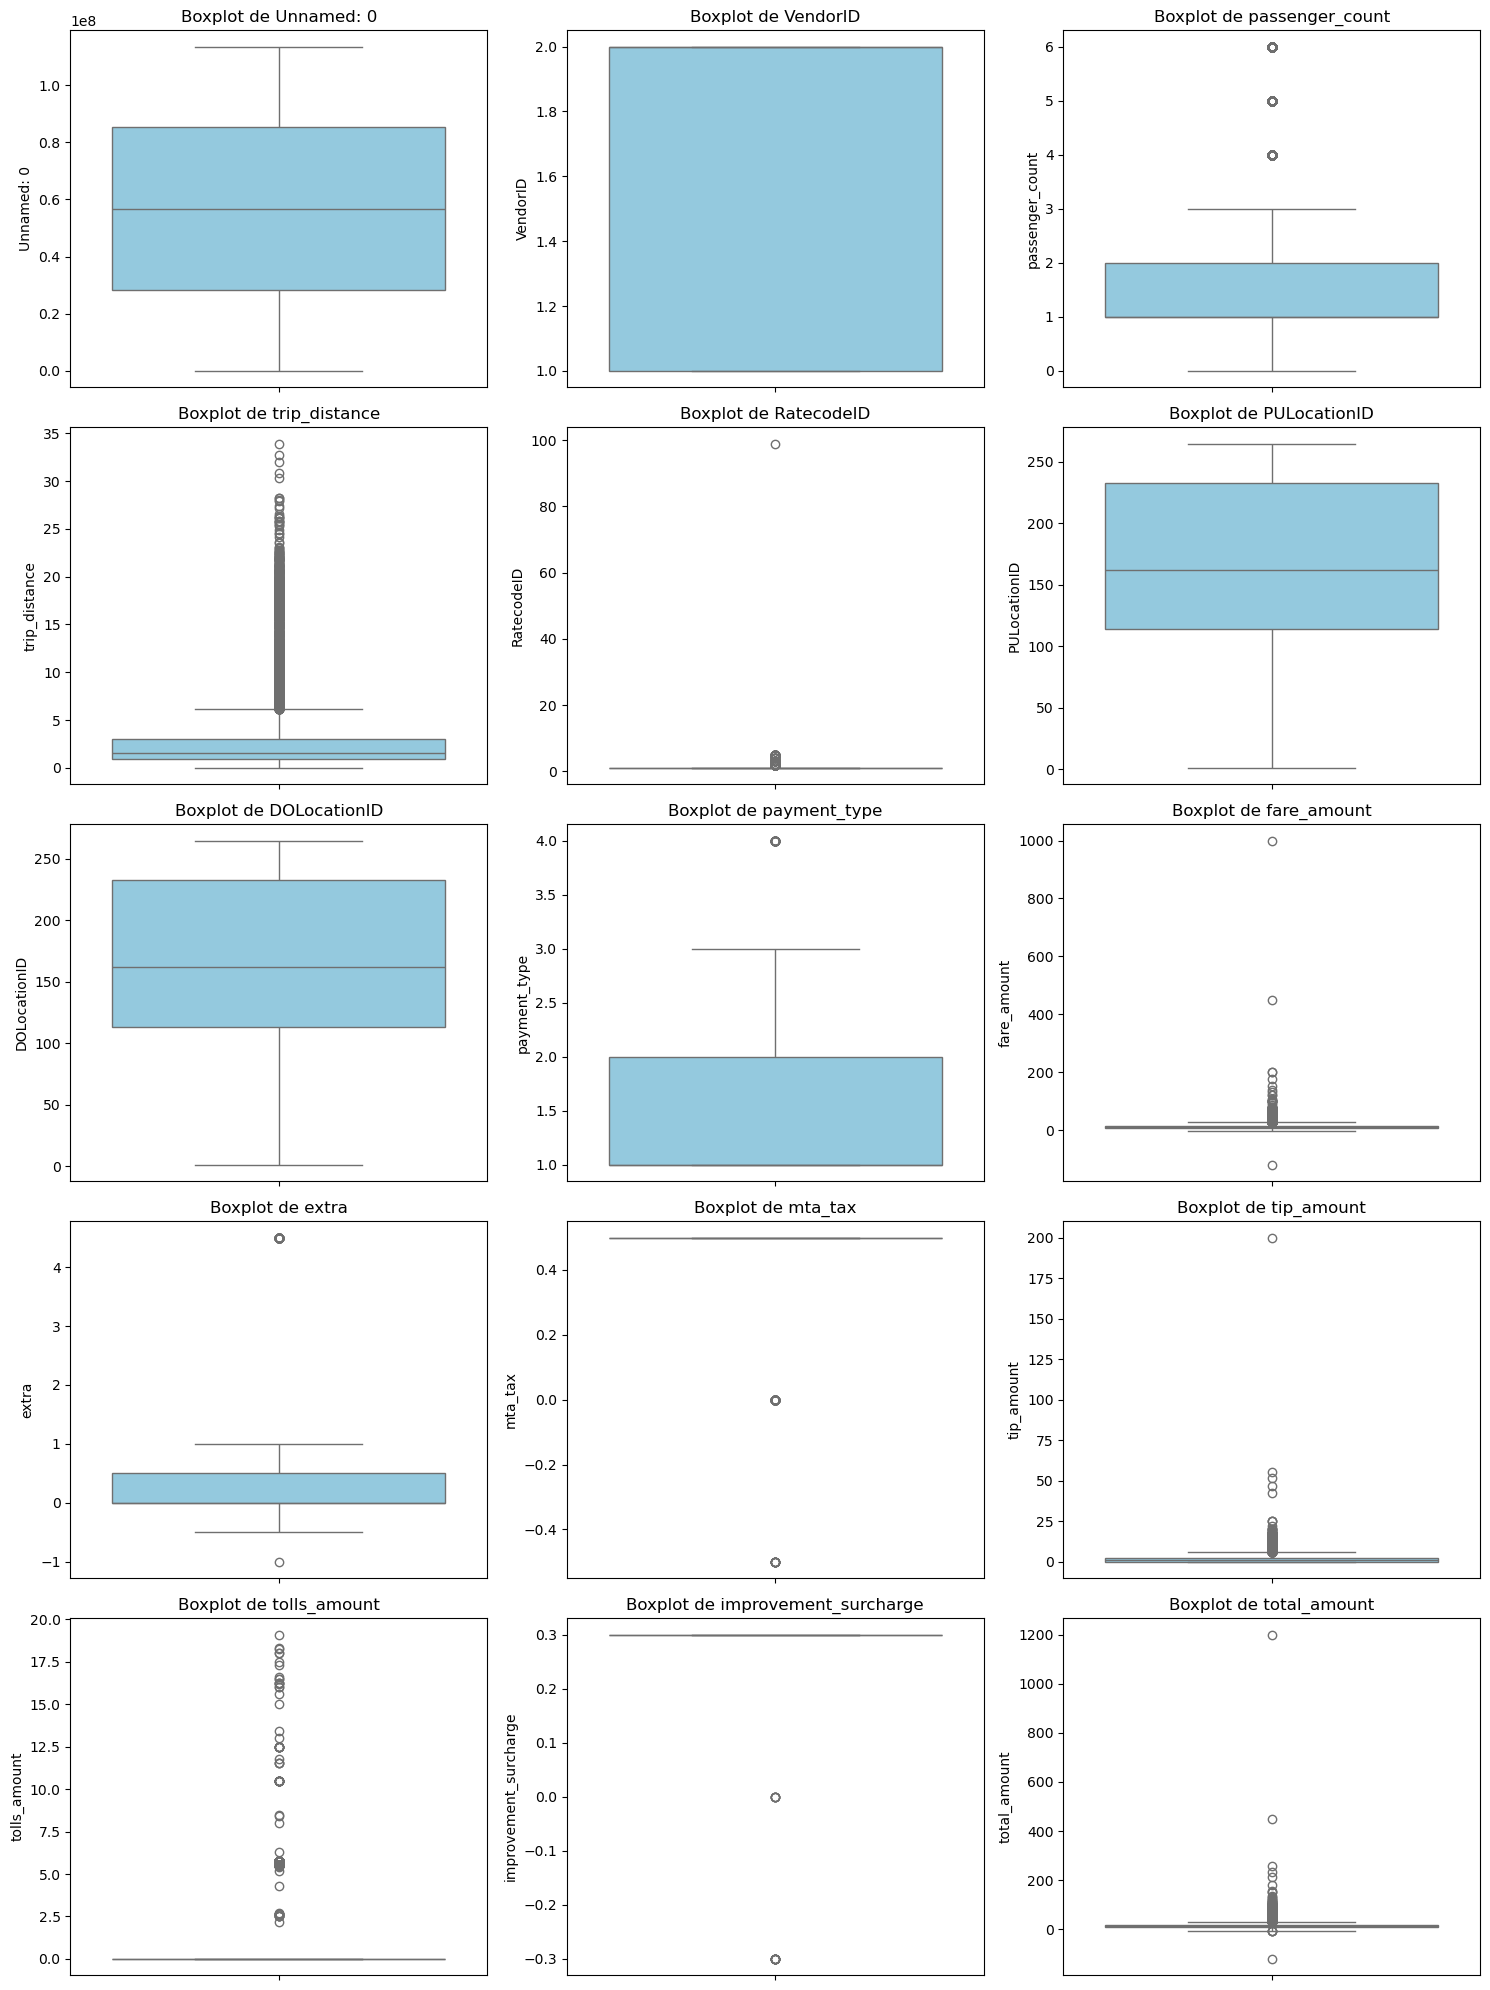

In [117]:
# Afficher les Boxplots (Toutes Variables)
plt.figure(figsize=(15, 20))  

colonnes_numeriques = datatrainset.select_dtypes(include=['int64', 'float64']).columns

for i, colonne in enumerate(colonnes_numeriques, 1):
    plt.subplot(5, 3, i)  
    sns.boxplot(data=datatrainset, y=colonne, color='skyblue')
    plt.title(f'Boxplot de {colonne}')
    plt.tight_layout()  

plt.show()

## Prétraitement Ciblé

### A. Nettoyage des colonnes inutiles

In [191]:
cols_to_drop = ['store_and_fwd_flag', 'mta_tax']  
datatrainset_clean = datatrainset.drop(cols_to_drop, axis=1)

- Variables constantes (store_and_fwd_flag = 100% de 'N')	Bruitent le modèle sans apporter d'information.	❌ Supprimer.
- Outliers extrêmes (fare_amount = -120)	Faussent les statistiques (moyenne, corrélations).	🧹 Nettoyer (ex: seuil fare_amount > 0).
- Colonnes redondantes (total_amount vs fare_amount + tip_amount)	Multicollinéarité (dégradent la performance des modèles linéaires).	🔄 Supprimer ou fusionner.

### B. Gestion des outliers 

#### Transformation Log/Box-Cox pour les Variables Numériques

In [208]:
# datatrainset_clean = datatrainset_clean[datatrainset_clean['fare_amount'] > 0]
# datatrainset_clean = datatrainset_clean[datatrainset_clean['RatecodeID'] != 99]

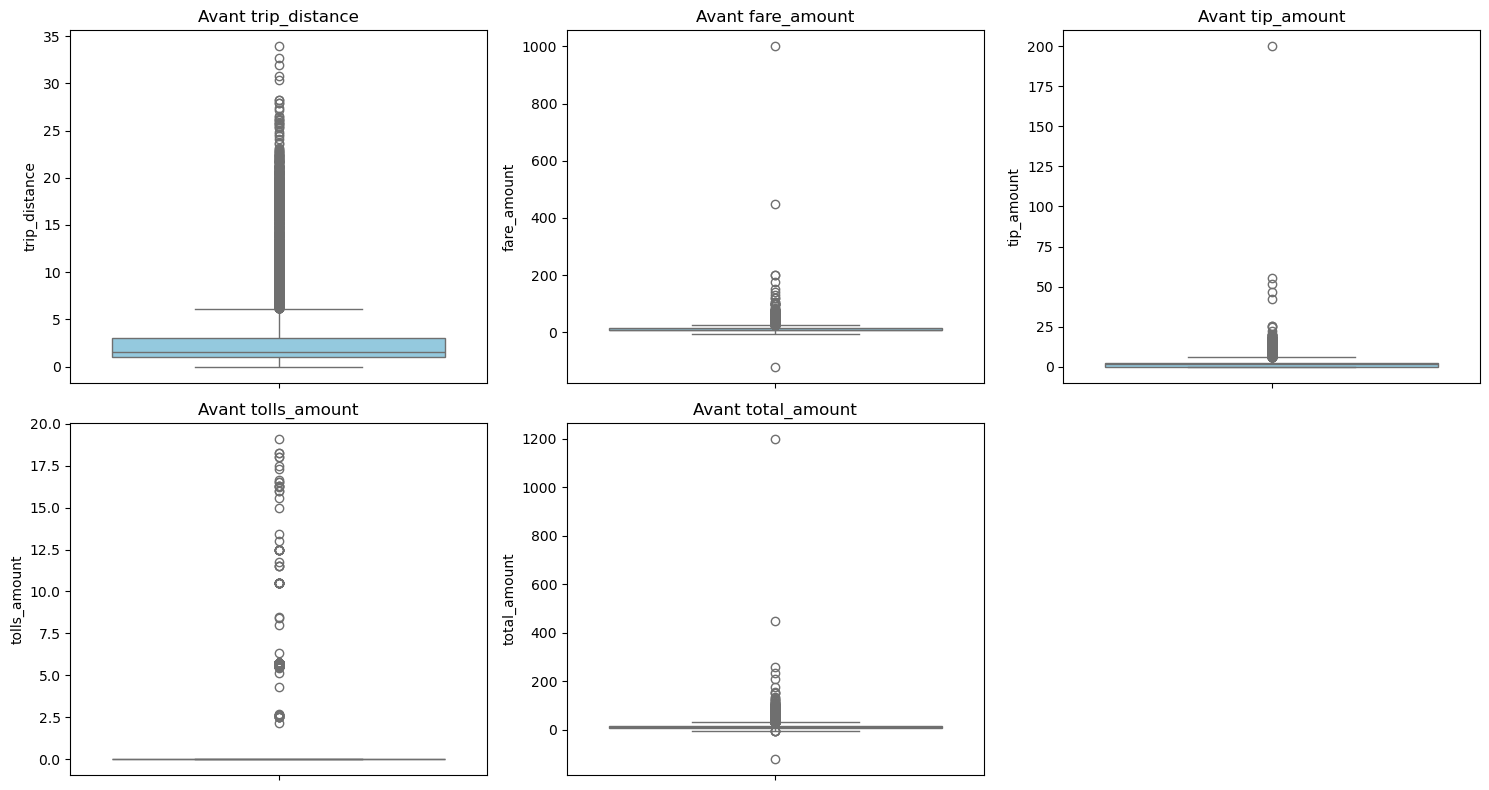

In [223]:
# Liste des variables numériques à traiter
numeric_cols = ['trip_distance', 'fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']

# Boxplot avant transformation
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=datatrainset, y=col, color='skyblue')
    plt.title(f"Avant {col}")
plt.tight_layout()
plt.show()

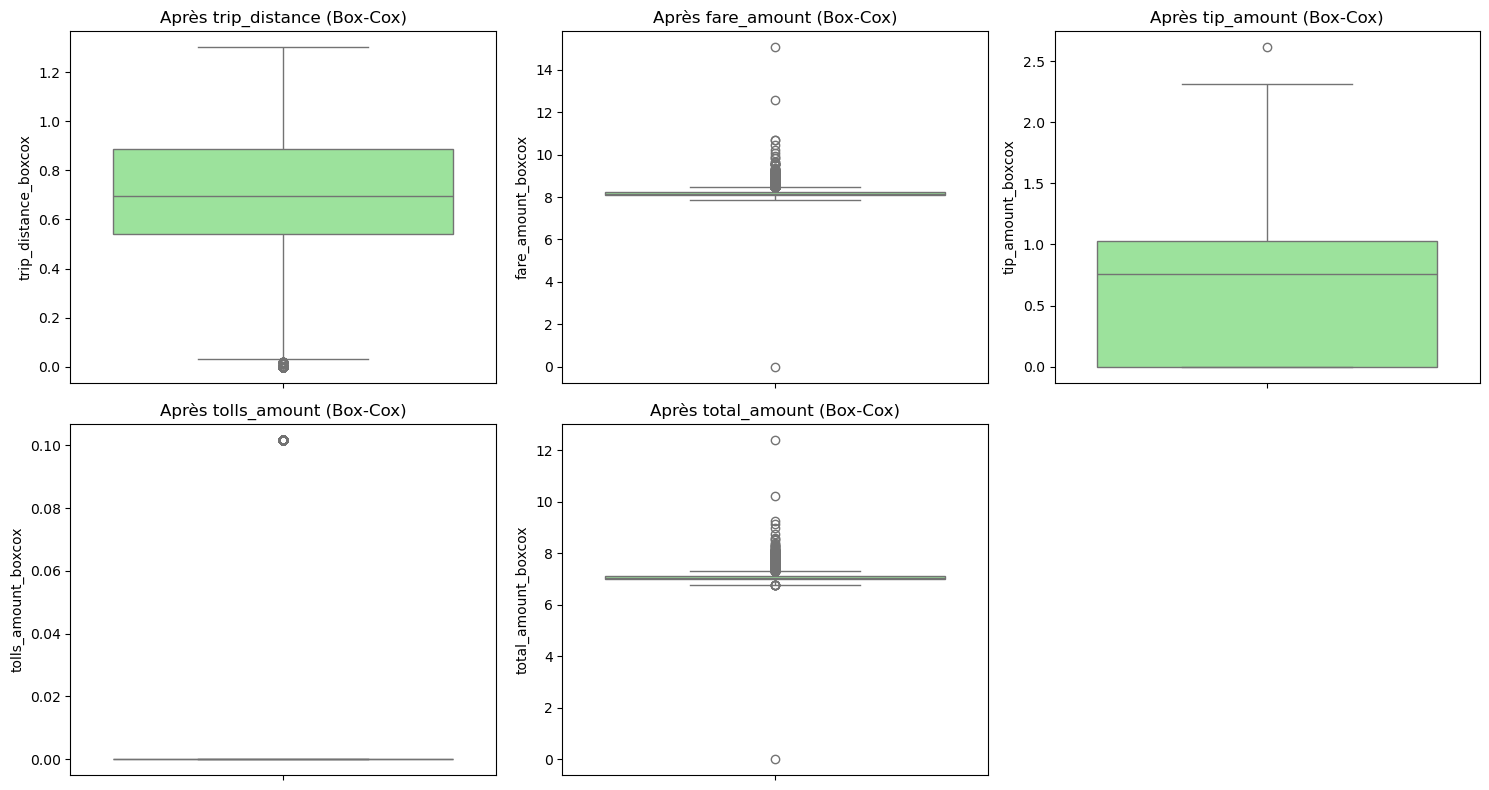

In [227]:
# Application de la Transformation Box-Cox
from scipy import stats

# Copie du dataframe pour éviter les modifications directes
df_transformed = datatrainset.copy()

# Transformation Box-Cox pour chaque colonne
for col in numeric_cols:
    # Ajout d'un offset si nécessaire (éviter les valeurs négatives/nulles)
    offset = 1 - df_transformed[col].min() if df_transformed[col].min() <= 0 else 0
    df_transformed[f"{col}_boxcox"], _ = stats.boxcox(df_transformed[col] + offset)

# Boxplot après transformation
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df_transformed, y=f"{col}_boxcox", color='lightgreen')
    plt.title(f"Après {col} (Box-Cox)")
plt.tight_layout()
plt.show()

- Réduction drastique des outliers visibles dans les boxplots.

- Distributions plus symétriques (meilleure compatibilité avec SMOTE).

## Application de SMOTE (Pour rééquilibrage des classes!!)

In [186]:
from imblearn.over_sampling import SMOTE

# Séparation X/y
X = datatrainset_clean.drop('is_generous', axis=1)
y = datatrainset_clean['is_generous']

# SMOTE uniquement sur le train set (après train_test_split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

ValueError: could not convert string to float: '03/09/2017 8:58:09 PM'

In [691]:
numeric_data = datatrainset.select_dtypes(include = [np.number])

In [695]:
for col in datatrainset.select_dtypes("object"):
    print(f"{col:-<50} {datatrainset[col].unique()}")

tpep_pickup_datetime------------------------------ ['04/16/2017 11:08:31 PM' '04/24/2017 6:52:50 AM' '05/21/2017 2:36:49 AM'
 ... '11/08/2017 3:04:53 PM' '01/24/2017 6:39:24 PM'
 '08/04/2017 2:54:38 PM']
tpep_dropoff_datetime----------------------------- ['04/16/2017 11:24:44 PM' '04/24/2017 6:55:51 AM' '05/21/2017 2:42:24 AM'
 ... '11/08/2017 3:16:02 PM' '01/24/2017 6:48:06 PM'
 '08/04/2017 3:38:15 PM']
store_and_fwd_flag-------------------------------- ['N' 'Y']


In [697]:
datatrainset["tpep_pickup_datetime"] = pd.to_datetime(datatrainset["tpep_pickup_datetime"])
datatrainset["tpep_dropoff_datetime"] = pd.to_datetime(datatrainset["tpep_dropoff_datetime"])
datatrainset["trip_duration"] = (datatrainset["tpep_dropoff_datetime"] - datatrainset["tpep_pickup_datetime"]).dt.total_seconds() / 60
datatrainset["pickup_hour"] = datatrainset["tpep_pickup_datetime"].dt.hour
datatrainset["pickup_minute"] = datatrainset["tpep_pickup_datetime"].dt.minute
datatrainset["pickup_second"] = datatrainset["tpep_pickup_datetime"].dt.second
datatrainset["pickup_day"] = datatrainset["tpep_pickup_datetime"].dt.day
datatrainset["pickup_dayofweek"] = datatrainset["tpep_pickup_datetime"].dt.dayofweek
datatrainset["pickup_day_name"] = datatrainset["tpep_pickup_datetime"].dt.day_name()
datatrainset["pickup_week"] = datatrainset["tpep_pickup_datetime"].dt.isocalendar().week
datatrainset["pickup_month"] = datatrainset["tpep_pickup_datetime"].dt.month
datatrainset["pickup_month_name"] = datatrainset["tpep_pickup_datetime"].dt.month_name()
datatrainset["pickup_year"] = datatrainset["tpep_pickup_datetime"].dt.year
datatrainset["is_weekend"] = datatrainset["pickup_dayofweek"].apply(lambda x: 1 if x >= 5 else 0)

C:\Users\PC\AppData\Local\Temp\ipykernel_2104\4139627289.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datatrainset["tpep_pickup_datetime"] = pd.to_datetime(datatrainset["tpep_pickup_datetime"])
C:\Users\PC\AppData\Local\Temp\ipykernel_2104\4139627289.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datatrainset["tpep_dropoff_datetime"] = pd.to_datetime(datatrainset["tpep_dropoff_datetime"])


In [699]:
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return "morning"
    elif 12 <= hour < 17:
        return "afternoon"
    elif 17 <= hour < 21:
        return "evening"
    else:
        return "night"

In [701]:
datatrainset["time_of_day"] = datatrainset["pickup_hour"].apply(get_time_of_day)

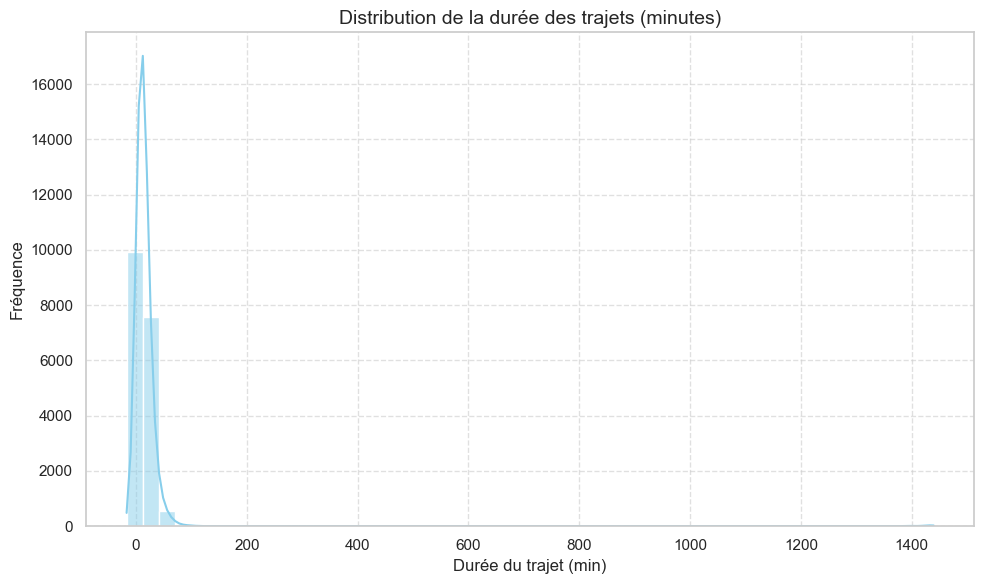

In [703]:
plt.figure(figsize=(10,6))
sns.histplot(datatrainset["trip_duration"], bins=50, kde=True, color="skyblue")
plt.title("Distribution de la durée des trajets (minutes)", fontsize=14)
plt.xlabel("Durée du trajet (min)", fontsize=12)
plt.ylabel("Fréquence", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_2104\3299309468.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="pickup_hour", data=datatrainset, palette="Blues_r")


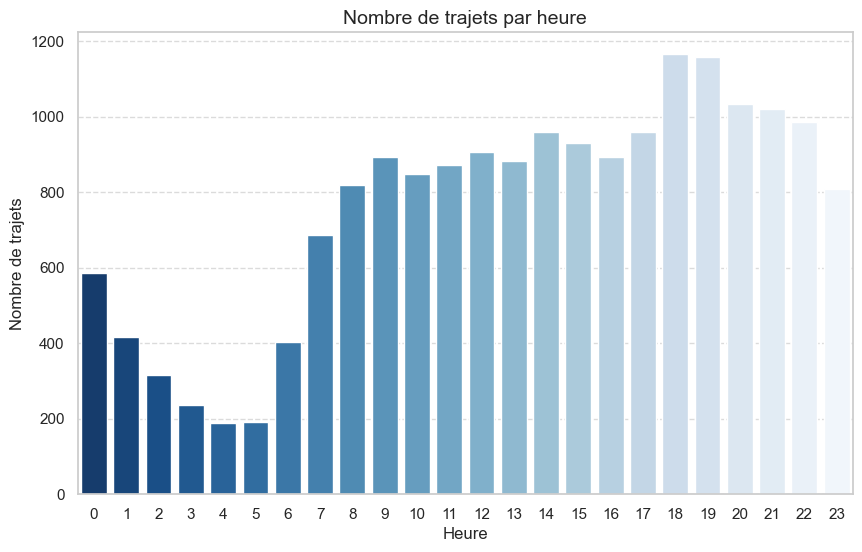

In [705]:
plt.figure(figsize=(10, 6))
sns.countplot(x="pickup_hour", data=datatrainset, palette="Blues_r")
plt.title("Nombre de trajets par heure", fontsize=14)
plt.xlabel("Heure", fontsize=12)
plt.ylabel("Nombre de trajets", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_2104\1809993338.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="pickup_day_name", data=datatrainset,


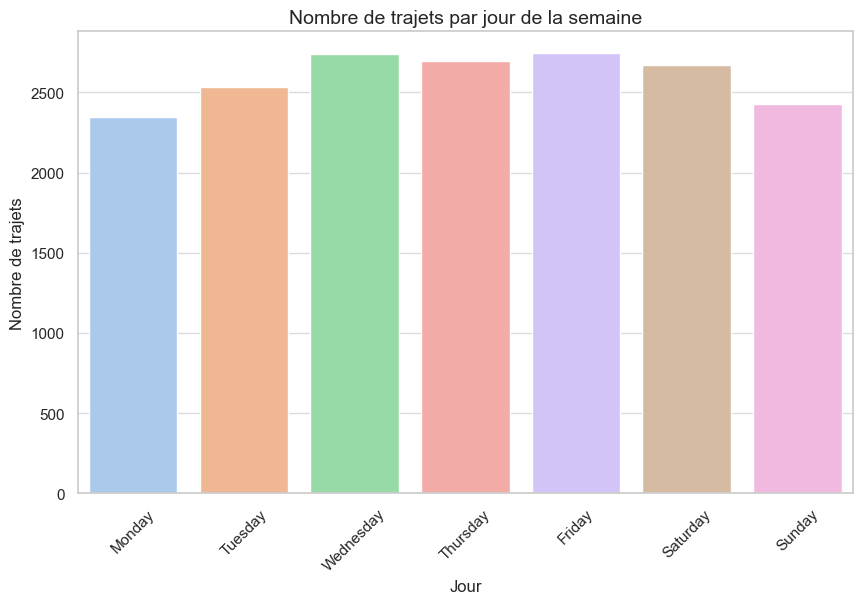

In [706]:
plt.figure(figsize=(10, 6))
sns.countplot(x="pickup_day_name", data=datatrainset,
order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], palette="pastel")
plt.title("Nombre de trajets par jour de la semaine", fontsize=14)
plt.xlabel("Jour", fontsize=12)
plt.ylabel("Nombre de trajets", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", alpha=0.7)
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_2104\1306745284.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="pickup_month_name", data=datatrainset, order=pd.date_range("2023-01-01", "2023-12-01", freq='MS').strftime("%B"), palette="coolwarm")


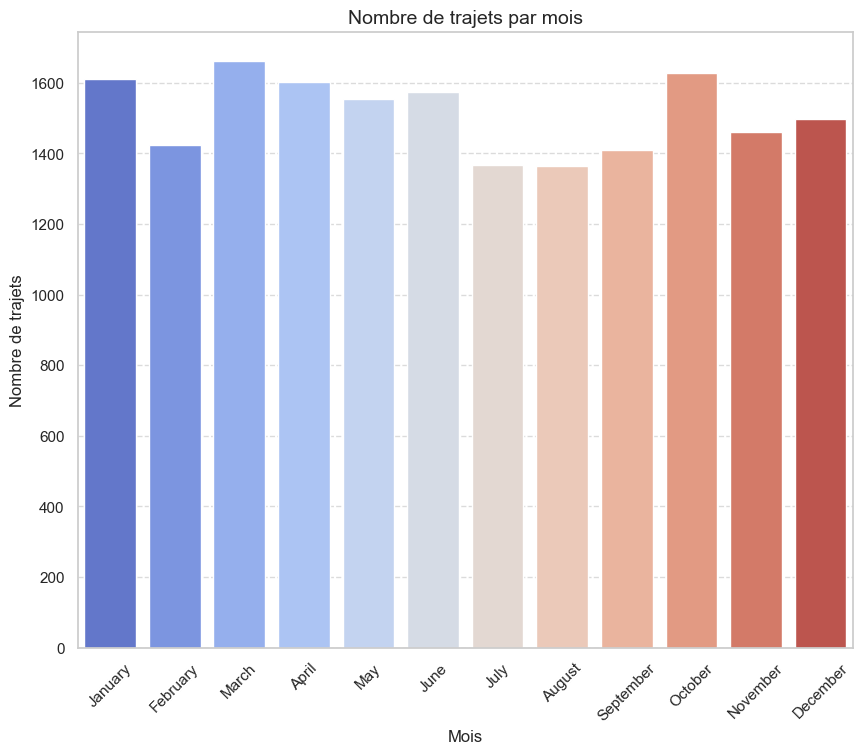

In [708]:
plt.figure(figsize=(10,8))
sns.countplot(x="pickup_month_name", data=datatrainset, order=pd.date_range("2023-01-01", "2023-12-01", freq='MS').strftime("%B"), palette="coolwarm")
plt.title("Nombre de trajets par mois", fontsize=14)
plt.xlabel("Mois", fontsize=12)
plt.ylabel("Nombre de trajets", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_2104\2906174301.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=datatrainset, x="time_of_day", order=order, palette="viridis")
C:\Users\PC\AppData\Local\Temp\ipykernel_2104\2906174301.py:8: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\PC\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


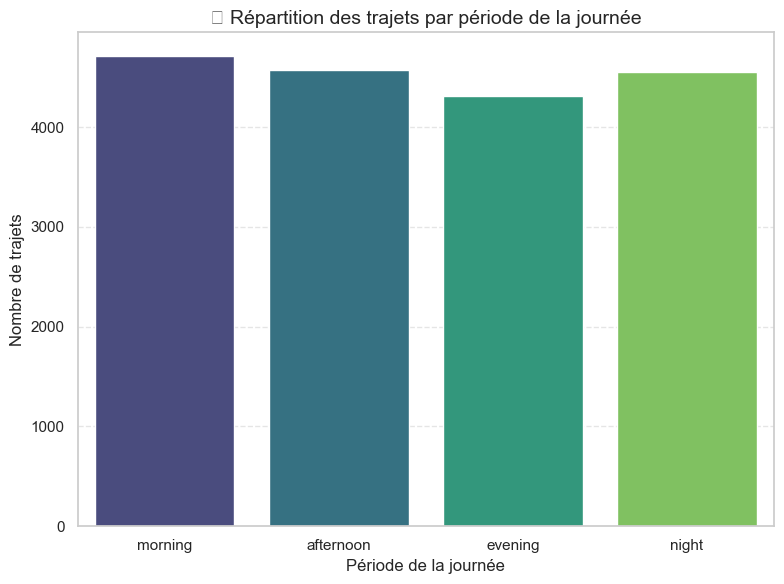

In [710]:
order = ["morning", "afternoon", "evening", "night"]
plt.figure(figsize=(8,6))
sns.countplot(data=datatrainset, x="time_of_day", order=order, palette="viridis")
plt.title("📊 Répartition des trajets par période de la journée", fontsize=14)
plt.xlabel("Période de la journée", fontsize=12)
plt.ylabel("Nombre de trajets", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_2104\96375828.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="pickup_year", data=datatrainset, palette="Blues")


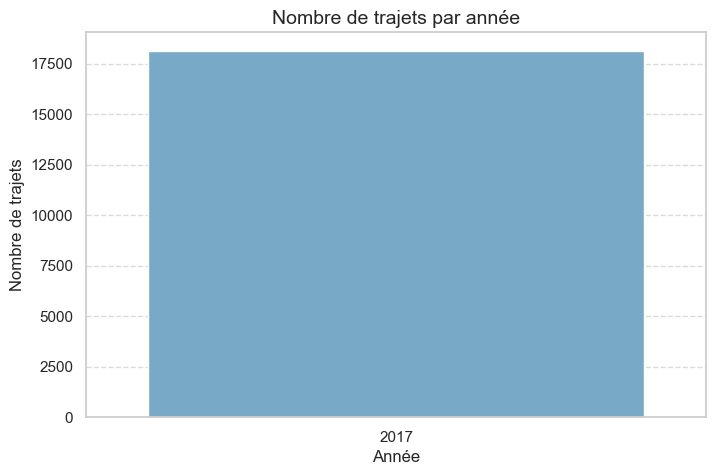

In [713]:
plt.figure(figsize=(8, 5))
sns.countplot(x="pickup_year", data=datatrainset, palette="Blues")
plt.title("Nombre de trajets par année", fontsize=14)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Nombre de trajets", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_2104\3529998399.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='VendorID', data=datatrainset, ax=ax, palette='Set3', edgecolor='black')
C:\Users\PC\AppData\Local\Temp\ipykernel_2104\3529998399.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


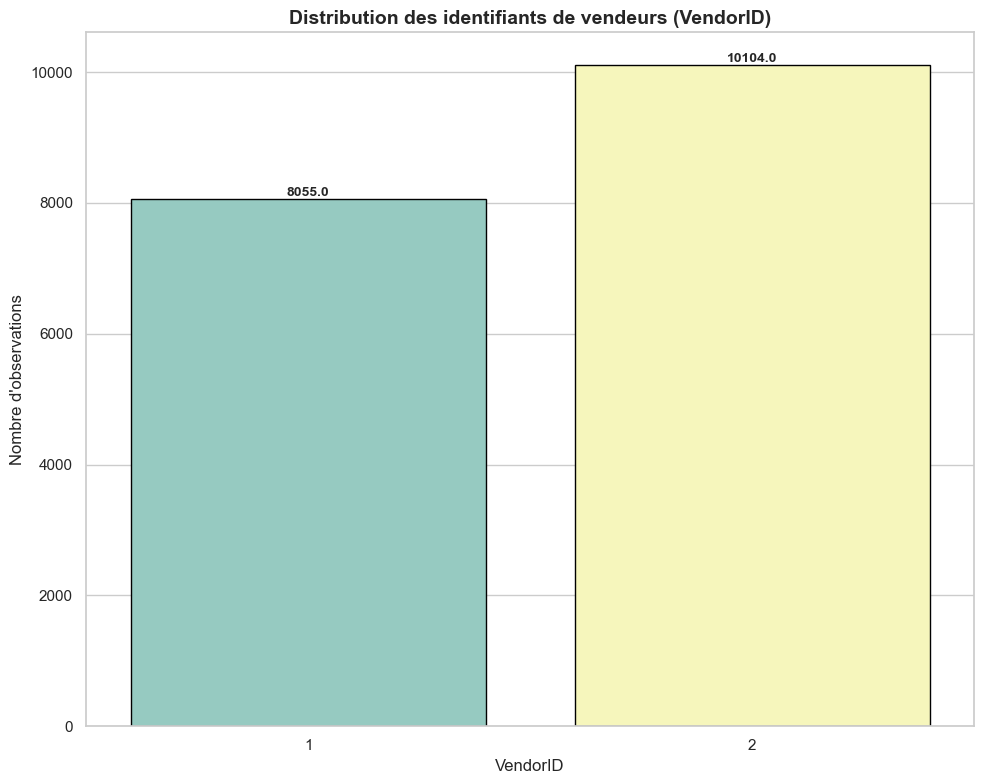

In [715]:
fig, ax = plt.subplots(figsize=(10, 8))

# Countplot
sns.countplot(x='VendorID', data=datatrainset, ax=ax, palette='Set3', edgecolor='black')

# Titre et axes
ax.set_title('Distribution des identifiants de vendeurs (VendorID)', fontsize=14, fontweight='bold')
ax.set_xlabel('VendorID', fontsize=12)
ax.set_ylabel('Nombre d\'observations', fontsize=12)

# Rotation des labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Affichage des valeurs sur les barres
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_2104\2955332278.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='passenger_count', data=datatrainset, ax=ax, palette='pastel', edgecolor='black')
C:\Users\PC\AppData\Local\Temp\ipykernel_2104\2955332278.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


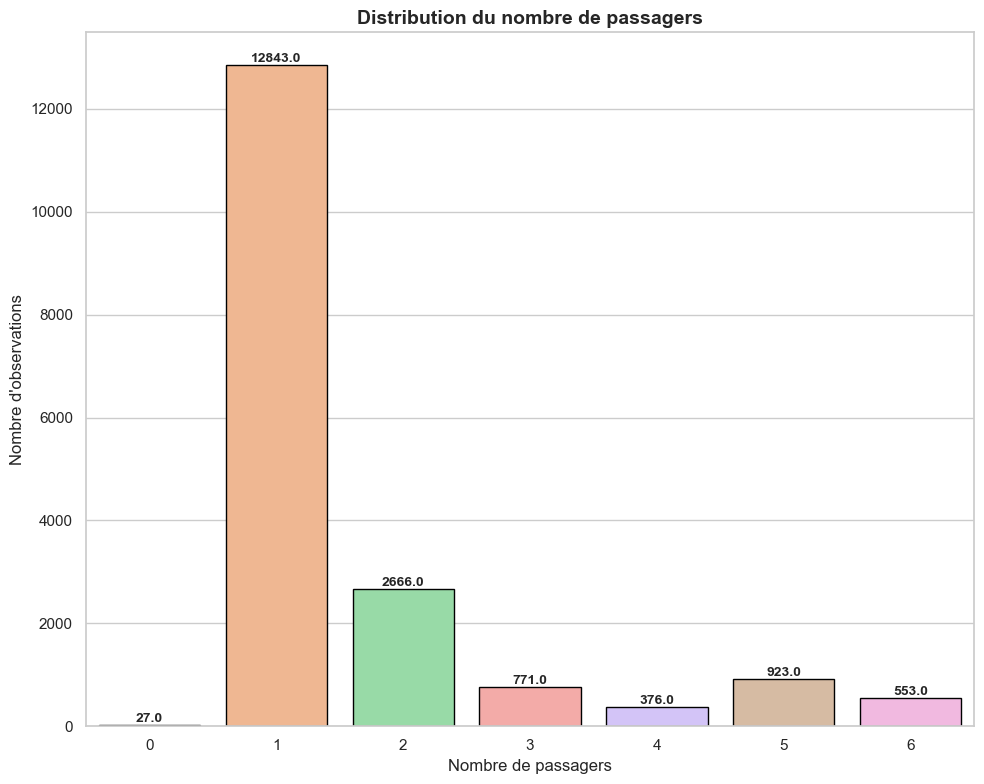

In [717]:
# Taille du graphique
fig, ax = plt.subplots(figsize=(10, 8))

# Countplot
sns.countplot(x='passenger_count', data=datatrainset, ax=ax, palette='pastel', edgecolor='black')

# Titre et axes
ax.set_title('Distribution du nombre de passagers', fontsize=14, fontweight='bold')
ax.set_xlabel('Nombre de passagers', fontsize=12)
ax.set_ylabel('Nombre d\'observations', fontsize=12)

# Rotation si nécessaire
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Affichage des valeurs sur les barres
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


<Axes: >

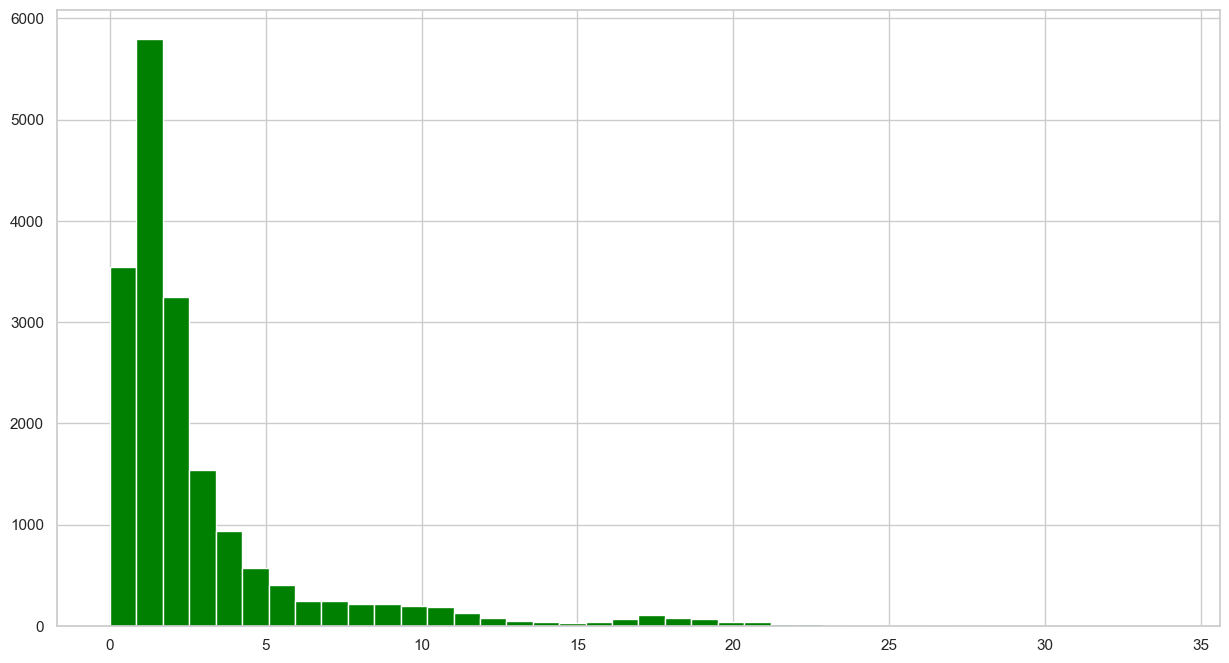

In [718]:
datatrainset['trip_distance'].hist(color='green',bins=40,figsize=(15,8))

C:\Users\PC\AppData\Local\Temp\ipykernel_2104\3937260355.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='payment_type', data=datatrainset, ax=ax, palette='Set2', edgecolor='black')


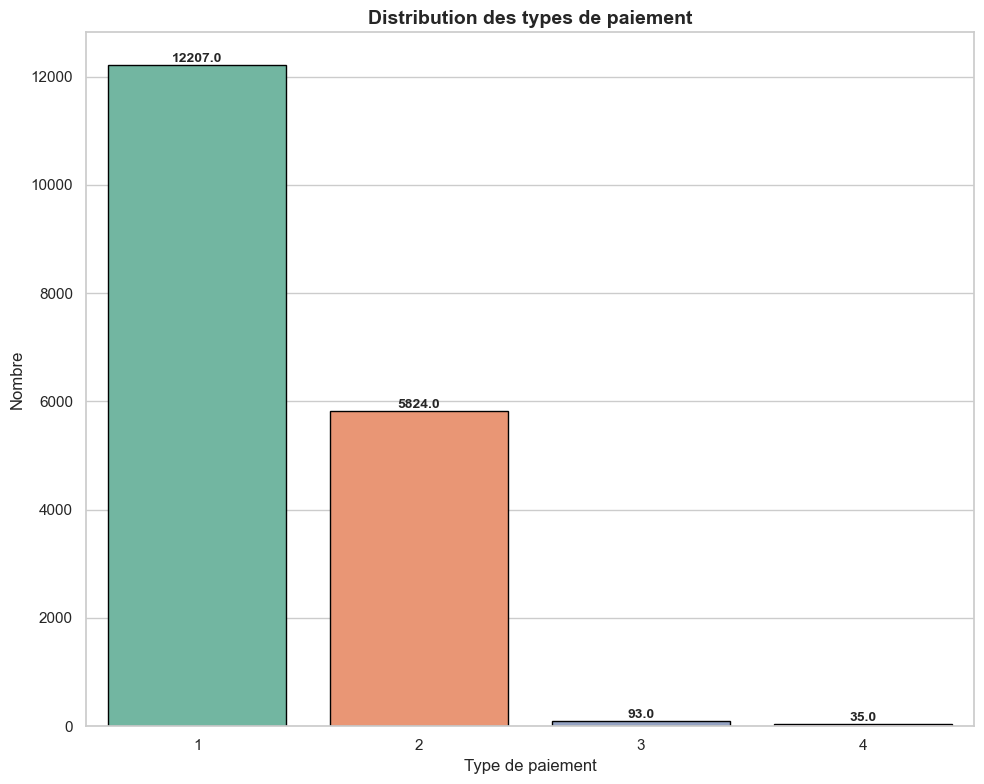

In [721]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mapping des codes vers les libellés


# Style seaborn
sns.set(style="whitegrid", palette="pastel")

# Taille de la figure
fig, ax = plt.subplots(figsize=(10, 8))

# Countplot avec valeurs mappées
sns.countplot(x='payment_type', data=datatrainset, ax=ax, palette='Set2', edgecolor='black')

# Titre et labels
ax.set_title('Distribution des types de paiement', fontsize=14, fontweight='bold')
ax.set_xlabel('Type de paiement', fontsize=12)
ax.set_ylabel('Nombre', fontsize=12)

# Afficher les valeurs sur les barres
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Affichage
plt.tight_layout()
plt.show()


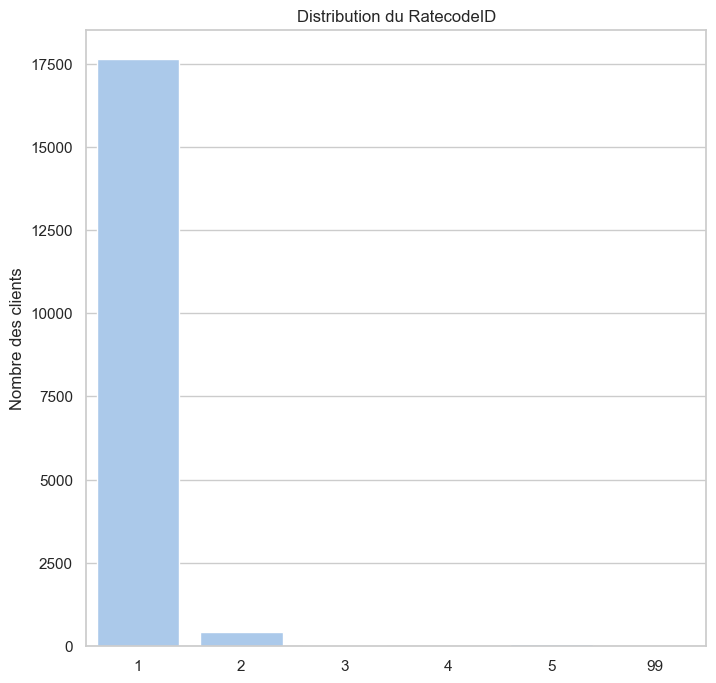

In [723]:
fig, ax = plt.subplots(figsize=(8, 8))
# Create a countplot to visualize the distribution of 'c'
sns.countplot(x='RatecodeID',data=datatrainset, ax=ax)
plt.title('Distribution du RatecodeID')
plt.xlabel('')
plt.ylabel('Nombre des clients')
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_2104\3440012494.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='store_and_fwd_flag', data=datatrainset, ax=ax, palette='Set2', edgecolor='black')
C:\Users\PC\AppData\Local\Temp\ipykernel_2104\3440012494.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


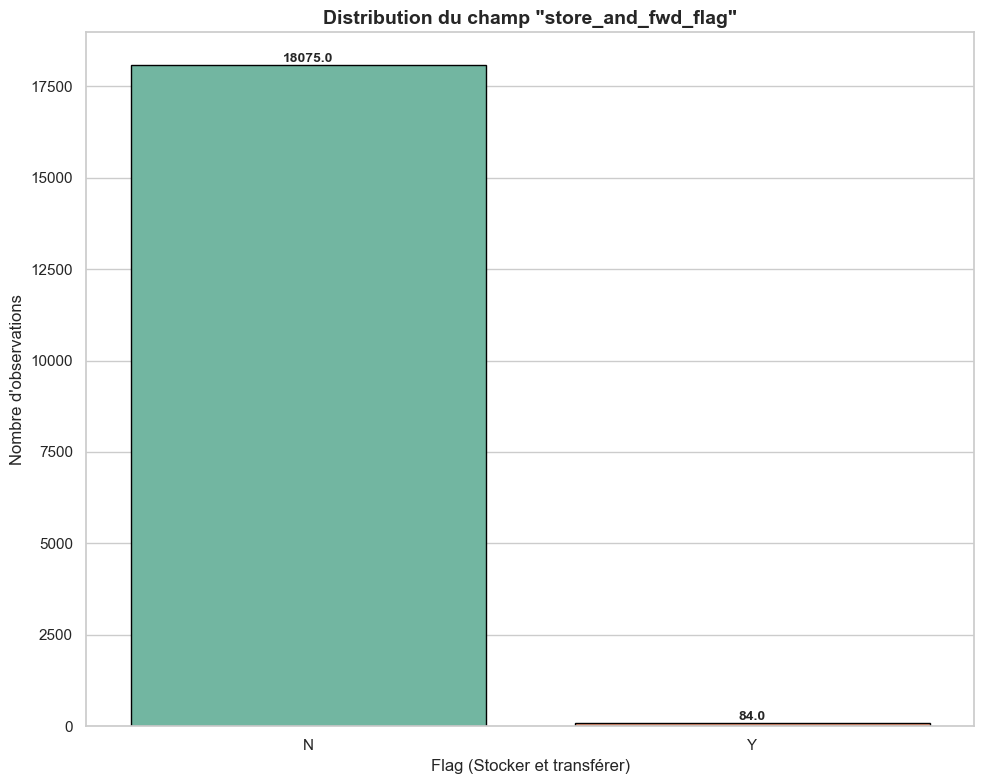

In [725]:
# Style général
sns.set(style="whitegrid", palette="pastel")

# Taille du graphique
fig, ax = plt.subplots(figsize=(10, 8))

# Countplot
sns.countplot(x='store_and_fwd_flag', data=datatrainset, ax=ax, palette='Set2', edgecolor='black')

# Titre et axes
ax.set_title('Distribution du champ "store_and_fwd_flag"', fontsize=14, fontweight='bold')
ax.set_xlabel('Flag (Stocker et transférer)', fontsize=12)
ax.set_ylabel('Nombre d\'observations', fontsize=12)

# Rotation des labels (si besoin)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Affichage des valeurs sur les barres
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


<Axes: >

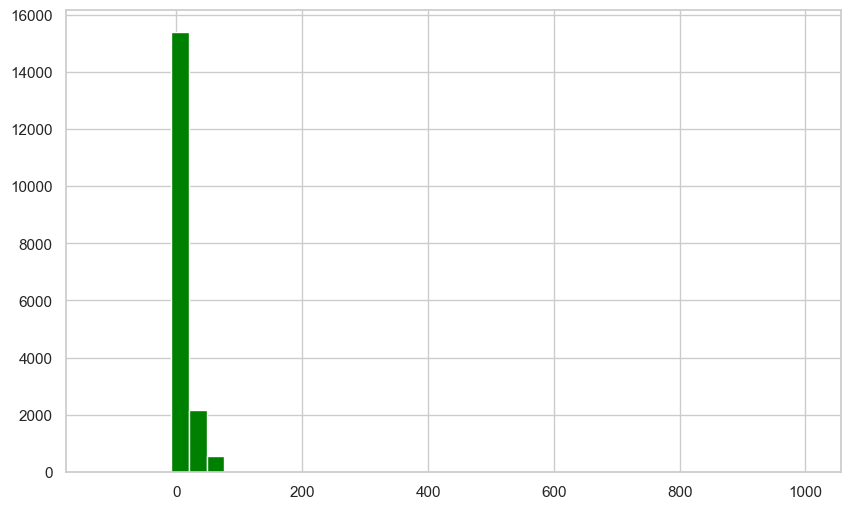

In [727]:
datatrainset['fare_amount'].hist(color='green',bins=40,figsize=(10,6))

In [729]:
datatrainset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18159 entries, 252 to 2732
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             18159 non-null  int64         
 1   VendorID               18159 non-null  int64         
 2   tpep_pickup_datetime   18159 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  18159 non-null  datetime64[ns]
 4   passenger_count        18159 non-null  int64         
 5   trip_distance          18159 non-null  float64       
 6   RatecodeID             18159 non-null  int64         
 7   store_and_fwd_flag     18159 non-null  object        
 8   PULocationID           18159 non-null  int64         
 9   DOLocationID           18159 non-null  int64         
 10  payment_type           18159 non-null  int64         
 11  fare_amount            18159 non-null  float64       
 12  extra                  18159 non-null  float64       
 13  mta_t

# Pré-Traitement

## Train Test

In [733]:
datatrainset1,datatestset1 =train_test_split(datatrainset,test_size=0.2,random_state=0)

##  Nettoyage

In [736]:
def nettoyage(df):
    df=df.drop('Unnamed: 0',axis=1)
    df=df[
    (df["passenger_count"] > 0) &
    (df["trip_distance"] > 0) &
    (df["fare_amount"] > 0) &
    (df["total_amount"] > 0) &
    (df["pickup_minute"]>0)].copy()
    return df

In [738]:
datatrainset1.shape

(14527, 31)

In [740]:
datatrainset_clean=nettoyage(datatrainset1)

In [742]:
datatrainset_clean.shape

(14159, 30)

In [744]:
datatestset1.shape

(3632, 31)

In [748]:
datatestset_clean=nettoyage(datatestset1)

In [750]:
datatestset_clean.shape

(3534, 30)

## Encodage

In [753]:
def encodage(datatrainset_clean):
    code1={'Y': 1, 'N': 0,
          'night':1,'morning':2,'afternoon':3, 'evening':4,
           'Sunday':0 ,'Monday':1 ,'Friday':5, 'Wednesday':3 ,'Saturday':6, 'Tuesday':2 ,'Thursday':4,
           'April':4, 'May':5, 'January':1 ,'June':6 ,'March':3, 'November':11, 'July':7, 
           'February':2,'October':10, 'December':12 ,'September':9 ,'August':8}
    for col in datatrainset_clean.select_dtypes('object').columns:
        datatrainset_clean.loc[:,col]=datatrainset_clean[col].map(code1)
    return datatrainset_clean

In [755]:
datatrainset_clean=encodage(datatrainset_clean)

In [757]:
datatestset_clean=encodage(datatestset_clean)

## FEATURE ENGINEERING:

In [760]:
def datatarget(datatrainset_clean):
    datatrainset_clean.insert(0, 'target', (datatrainset_clean['tip_amount'] >= 0.2 * datatrainset_clean['fare_amount']).astype(int))
    return datatrainset_clean

In [764]:
datatrainset_clean=datatarget(datatrainset_clean)

In [768]:
datatestset_clean=datatarget(datatestset_clean)

In [770]:
datatrainset_clean['target'].value_counts()

target
0    7176
1    6983
Name: count, dtype: int64

In [772]:
datatestset_clean['target'].value_counts()

target
0    1785
1    1749
Name: count, dtype: int64

In [798]:
datatrainset_clean

,target,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,pickup_second,pickup_day,pickup_dayofweek,pickup_day_name,pickup_week,pickup_month,pickup_month_name,pickup_year,is_weekend,time_of_day
753,1,1,2017-08-23 11:54:51,2017-08-23 12:06:21,1,1.20,1,0,113,148,...,51,23,2,3,34,8,8,2017,0,2
16476,0,2,2017-02-01 22:14:14,2017-02-01 22:38:31,4,16.85,1,0,132,212,...,14,1,2,3,5,2,2,2017,0,1
8320,1,1,2017-04-20 22:21:59,2017-04-20 22:32:28,1,2.00,1,0,239,141,...,59,20,3,4,16,4,4,2017,0,1
14018,1,1,2017-12-11 13:21:03,2017-12-11 13:31:01,1,1.00,1,0,237,43,...,3,11,0,1,50,12,12,2017,0,3
9771,0,2,2017-10-17 21:05:26,2017-10-17 21:09:26,2,0.92,1,0,162,141,...,26,17,1,2,42,10,10,2017,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8189,1,1,2017-06-28 07:59:53,2017-06-28 08:06:58,1,1.10,1,0,107,170,...,53,28,2,3,26,6,6,2017,0,2
3363,0,2,2017-10-27 09:39:50,2017-10-27 09:46:51,1,0.77,1,0,141,161,...,50,27,4,5,43,10,10,2017,0,2
13615,0,2,2017-10-06 08:35:57,2017-10-06 08:49:28,1,1.50,1,0,137,68,...,57,6,4,5,40,10,10,2017,0,2
8951,0,2,2017-07-06 11:16:16,2017-07-06 11:18:23,2,0.29,1,0,164,170,...,16,6,3,4,27,7,7,2017,0,2


C:\Users\PC\AppData\Local\Temp\ipykernel_2104\2006161260.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=datatrainset_clean, ax=ax, palette='Set3', edgecolor='black')
C:\Users\PC\AppData\Local\Temp\ipykernel_2104\2006161260.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


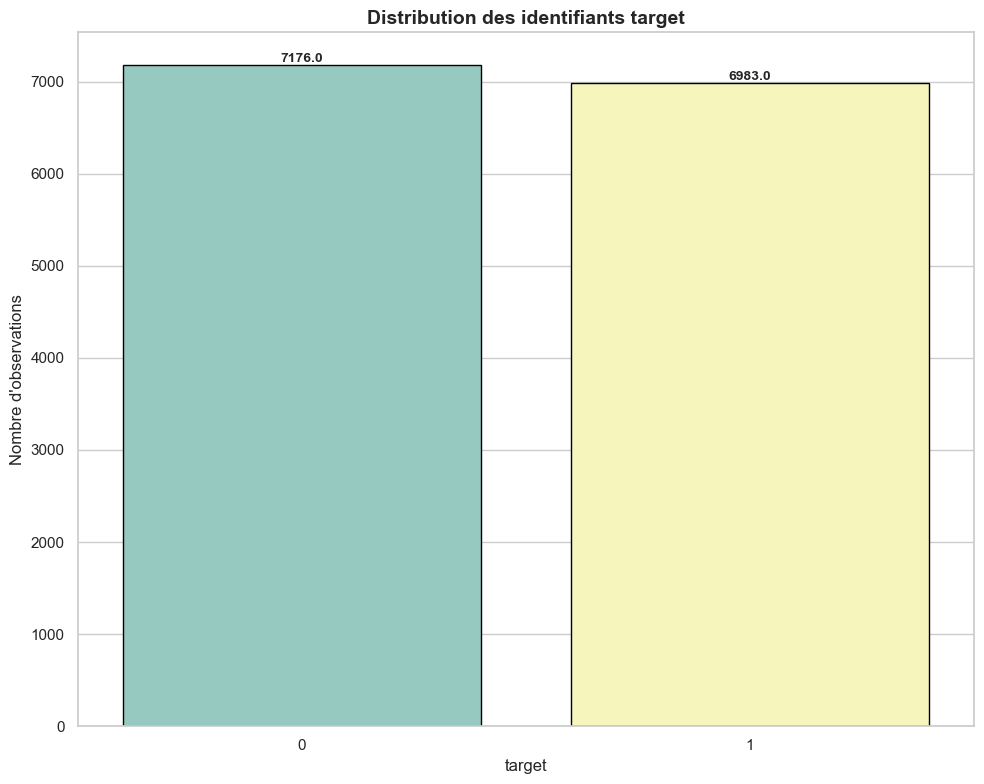

In [776]:
fig, ax = plt.subplots(figsize=(10, 8))

# Countplot
sns.countplot(x='target', data=datatrainset_clean, ax=ax, palette='Set3', edgecolor='black')

# Titre et axes
ax.set_title('Distribution des identifiants target', fontsize=14, fontweight='bold')
ax.set_xlabel('target', fontsize=12)
ax.set_ylabel('Nombre d\'observations', fontsize=12)

# Rotation des labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Affichage des valeurs sur les barres
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

## FEATURE SCALING

In [779]:
numerical_cols = datatrainset_clean.select_dtypes(include=['float64', 'int64']).columns
print("Numerical columns:", numerical_cols)

Numerical columns: Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'trip_duration', 'is_weekend'],
      dtype='object')


In [781]:
df_treat=datatrainset_clean.copy()

## FEATURE SELECTION

In [784]:
from sklearn.preprocessing import StandardScaler
# StandardScaler est utilisé pour standardiser les caractéristiques (moyenne=0, écart-type=1)
scaler = StandardScaler()
# Création d'une instance de la classe StandardScaler
# Cet objet sera utilisé pour appliquer la standardisation aux colonnes numériques
numerical_cols = df_treat.select_dtypes(include=['float64', 'int64']).columns
#On sélectionne uniquement les colonnes numériques pour les manipuler
df_scaled = df_treat.copy() 
df_scaled[numerical_cols] = scaler.fit_transform(df_treat[numerical_cols])

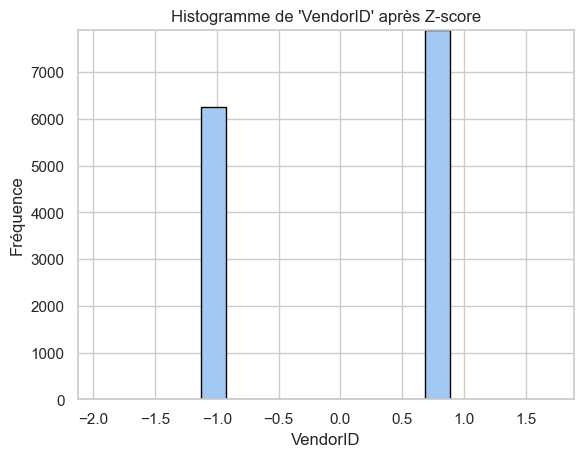

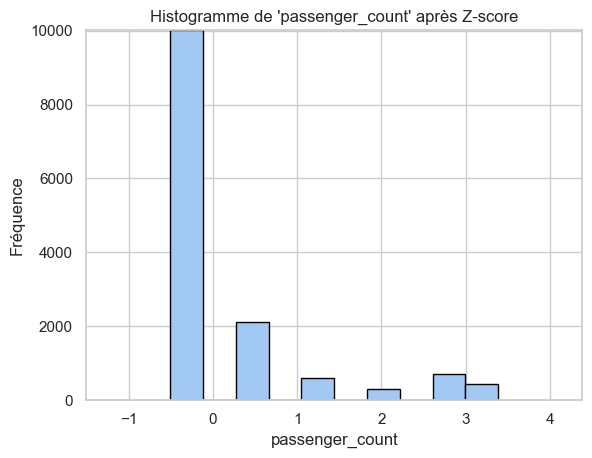

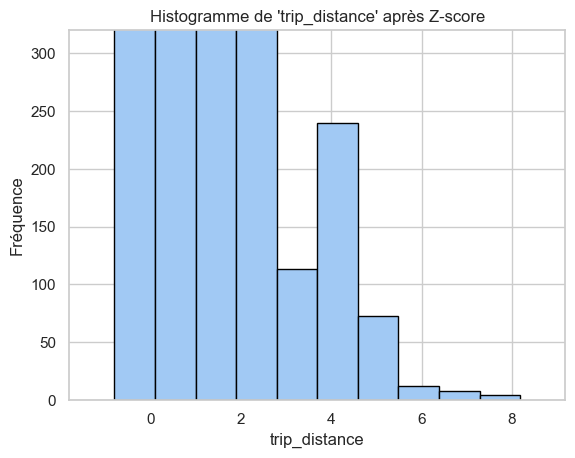

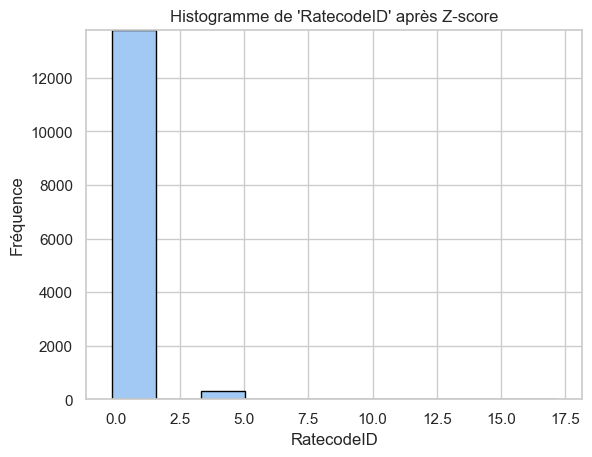

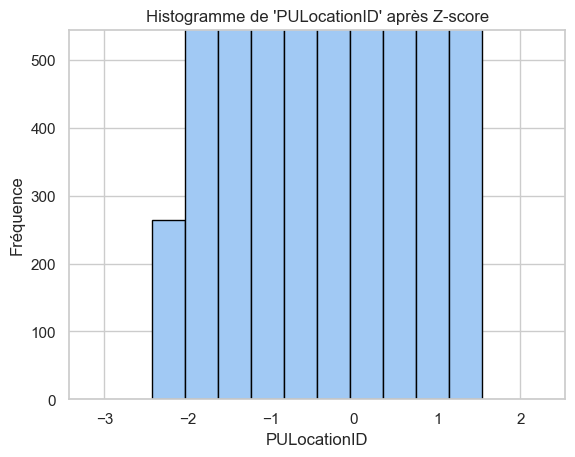

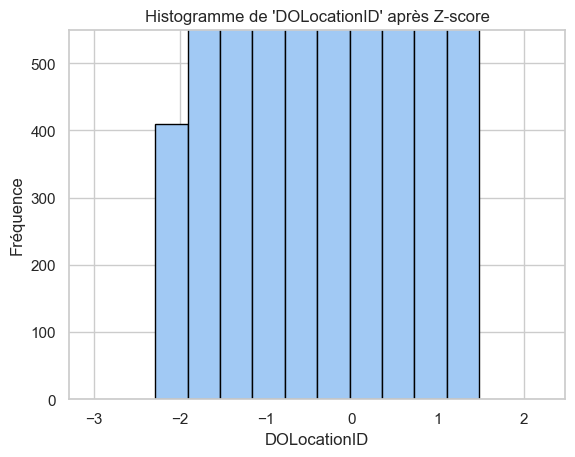

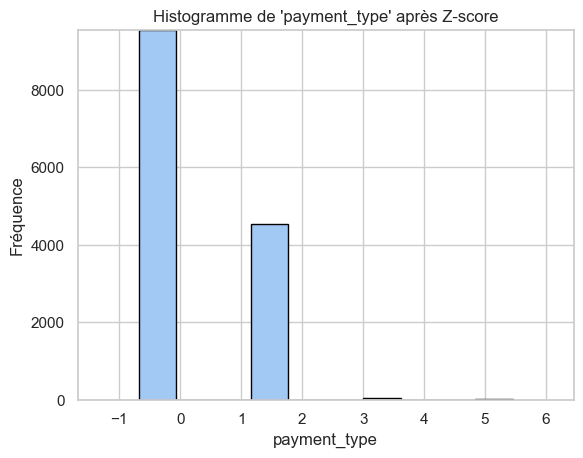

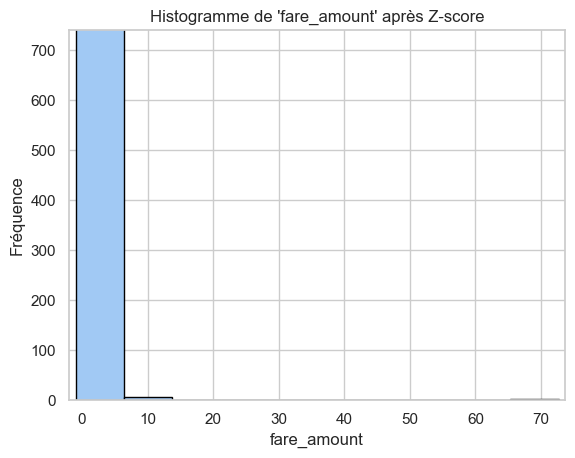

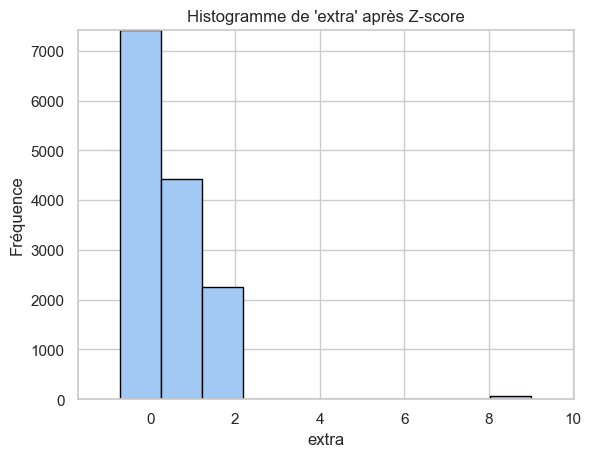

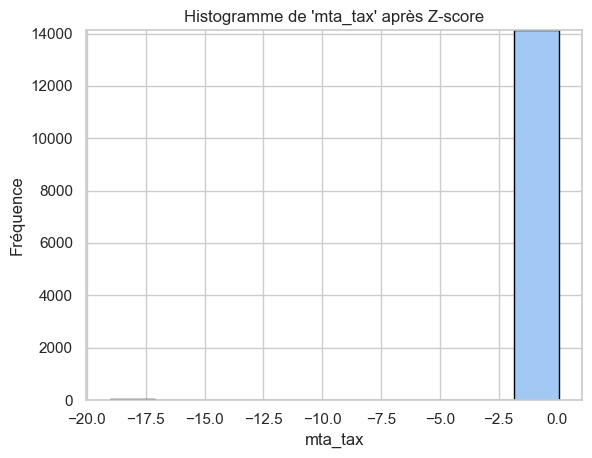

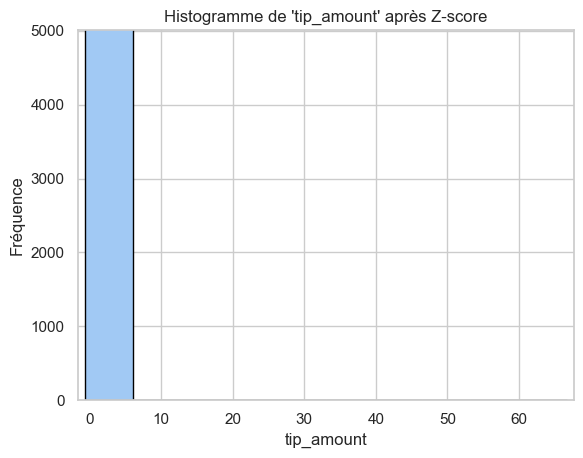

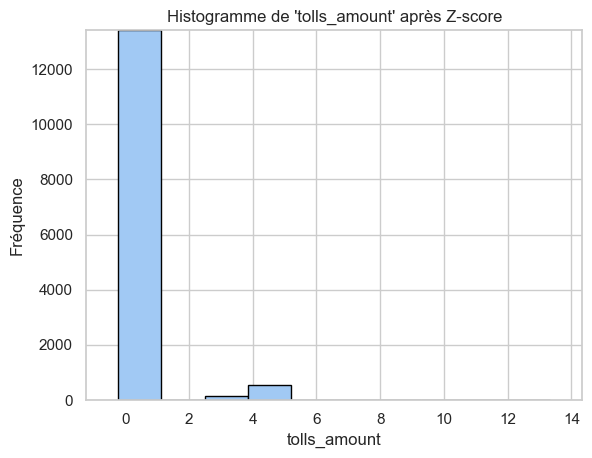

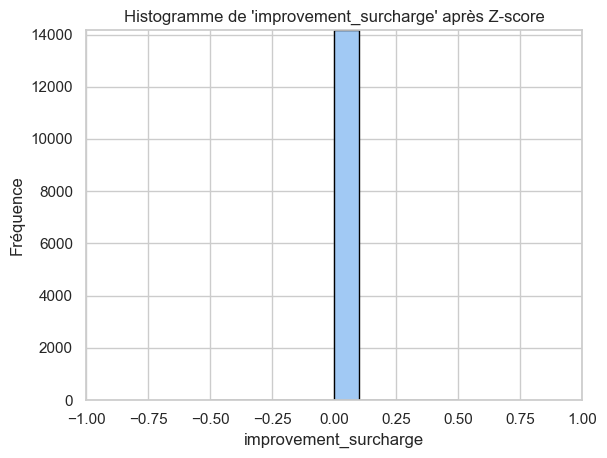

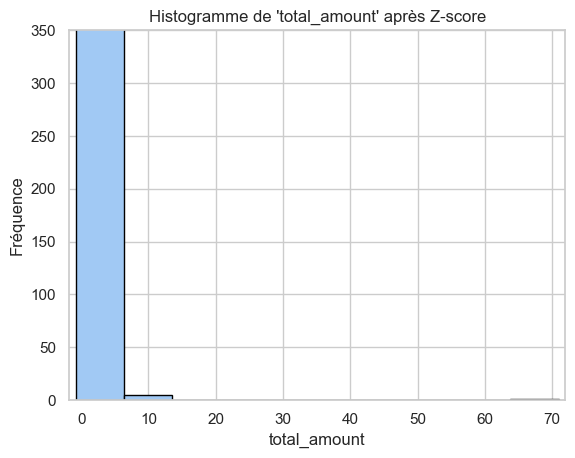

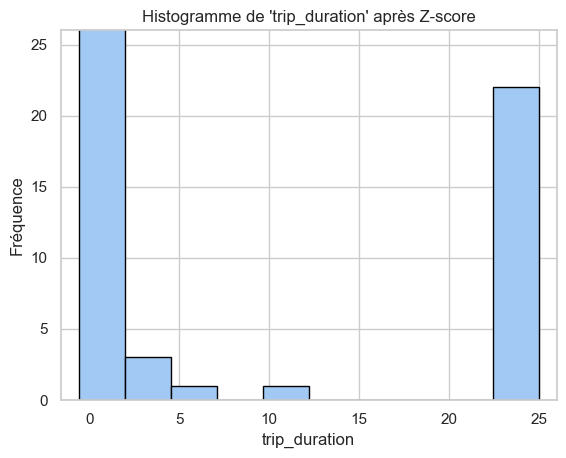

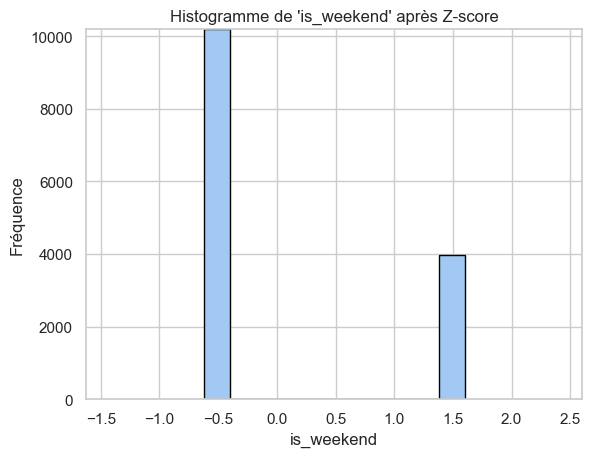

In [786]:
for column in df_scaled.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure()  
    df_scaled[column].hist(bins=10, edgecolor='black')  
    plt.title(f"Histogramme de '{column}' après Z-score")  
    plt.xlabel(column)  
    plt.ylabel('Fréquence')  

    
    plt.xlim(df_scaled[column].min() - 1, df_scaled[column].max() + 1)  
    plt.ylim(0, df_scaled[column].value_counts().max() + 1)  

    plt.show()  

In [800]:
from sklearn.decomposition import PCA
numerical_cols = df_scaled.select_dtypes(include=[np.number])
acp = PCA()
acp.fit(numerical_cols)

# Obtenir le ratio de variance expliquée
explained_variance_ratio = acp.explained_variance_ratio_

# Calculer la variance expliquée cumulée
cumulative_variance = explained_variance_ratio.cumsum()

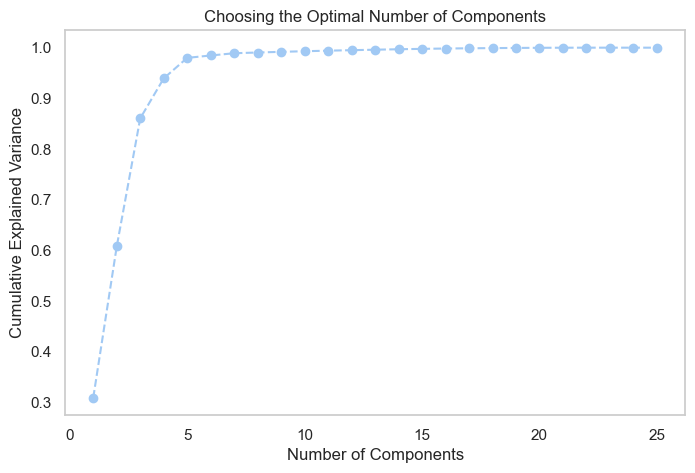

In [802]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Choosing the Optimal Number of Components')
plt.grid()
plt.show()

In [803]:
#Crée un modèle ACP avec 10 composantes principales. et Appliquer le modèle PCA aux données numériques
acp = PCA(n_components=25)
acp.fit(numerical_cols)

PCA(n_components=25)

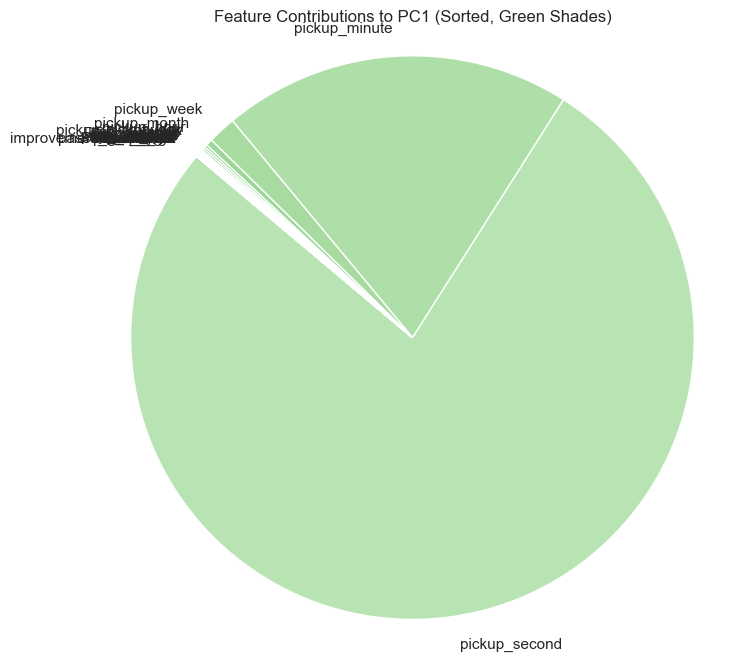

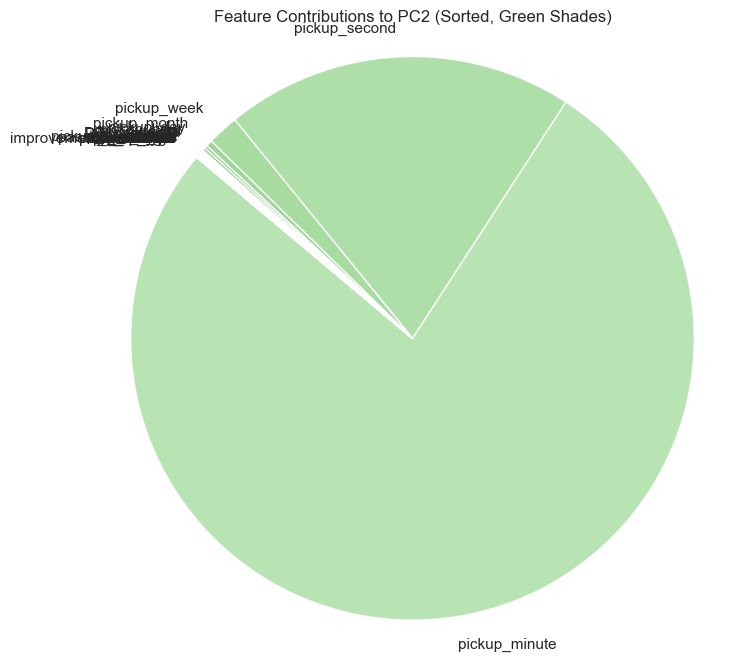

In [806]:
loadings = pd.DataFrame(acp.components_, columns=numerical_cols.columns, index=[f'PC{i+1}' for i in range(acp.n_components_)])

# Select PC1 and PC2 loadings
pc1_loadings = loadings.loc["PC1"]
pc2_loadings = loadings.loc["PC2"]

# Convert to absolute values and normalize to percentage
pc1_percent = (np.abs(pc1_loadings) / np.abs(pc1_loadings).sum()) * 100
pc2_percent = (np.abs(pc2_loadings) / np.abs(pc2_loadings).sum()) * 100

# Sort values from highest to lowest
pc1_percent = pc1_percent.sort_values(ascending=False)
pc2_percent = pc2_percent.sort_values(ascending=False)

# Generate color shades from dark green to light green
def generate_green_shades(n):
    return plt.cm.Greens(np.linspace(0.3, 1, n))  # Adjust the 0.3 to control lightest shade

# Function to plot a sorted pie chart with green shades (without percentages)
def plot_pie_chart(data, title):
    colors = generate_green_shades(len(data))  # Generate n green shades
    plt.figure(figsize=(8, 8))
    plt.pie(data, labels=data.index, startangle=140, colors=colors)  # Removed autopct
    plt.title(title)
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
    plt.show()

# Plot sorted pie charts with green shades (without percentages)
plot_pie_chart(pc1_percent, "Feature Contributions to PC1 (Sorted, Green Shades)")
plot_pie_chart(pc2_percent, "Feature Contributions to PC2 (Sorted, Green Shades)")


In [807]:
# fonction pour afficher les composantes principales 
def plot_var_explique (acp):
    var_explique = acp.explained_variance_ratio_
    plt.bar(np.arange(len(var_explique ))+1, var_explique )
    plt.plot(np.arange(len(var_explique ))+1, var_explique .cumsum(),c="red",marker='o')
    plt.xlabel("la rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title(" Eboulis des valeurs propres")
    plt.show(block=False)

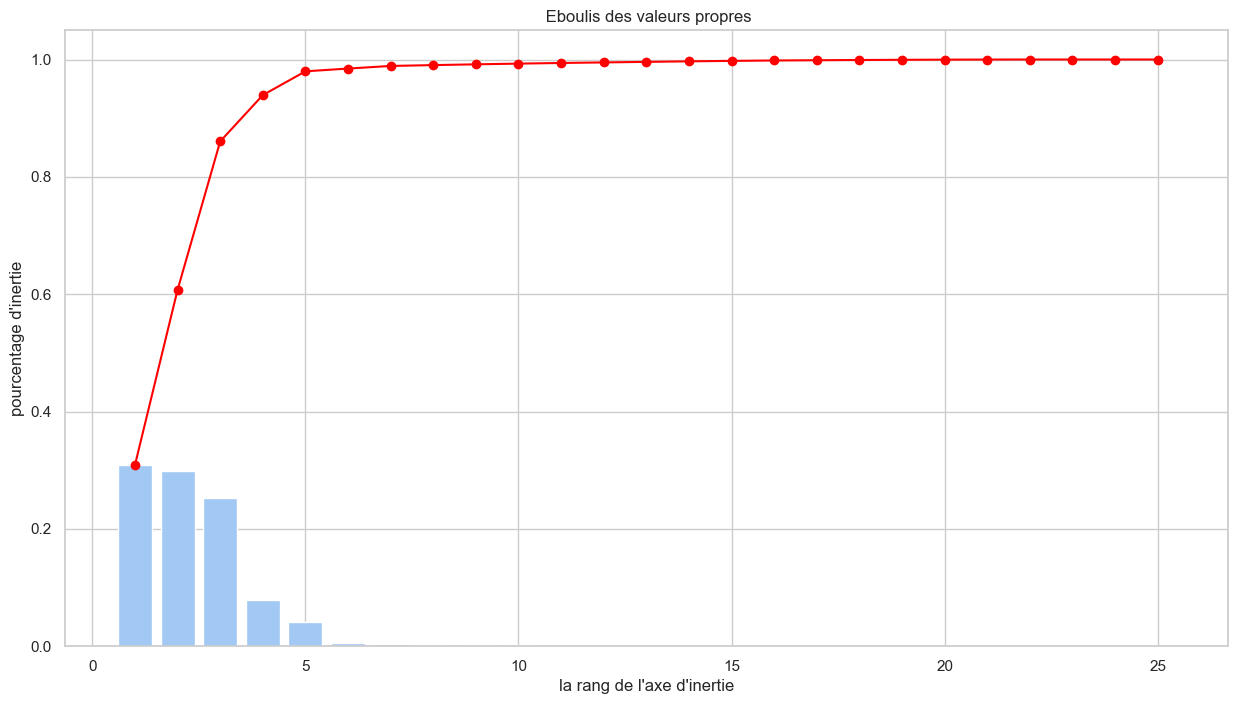

In [810]:
plt.figure( figsize = ( 15, 8)) 
plot_var_explique (acp)

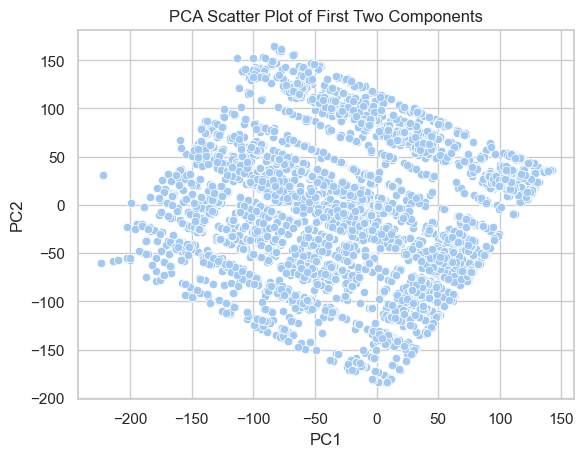

Explained variance ratio of the components:
[3.93088625e-01 3.22232100e-01 2.48440006e-01 3.50579656e-02
 4.93674159e-04 3.93566598e-04 1.27798123e-04 9.94454287e-05
 2.16925621e-05 1.72652727e-05]


In [812]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame (you should already have your 'df' DataFrame)
# df = your_dataframe

# Step 1: Select numerical columns (float64, int64 types)
numerical_cols = datatrainset_clean.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Handle NaN and infinite values (if any), drop rows with NaN values
df_clean = datatrainset_clean[numerical_cols]

# Replace Inf/-Inf with NaN, then drop NaN values
df_clean = df_clean.replace([np.inf, -np.inf], np.nan).dropna()

# Step 3: Apply PCA transformation
acp = PCA(n_components=10)  # 10 principal components (you can adjust this)
acp.fit(df_clean)  # Fit PCA to the cleaned numerical data
transformed_data = acp.transform(df_clean)  # Apply PCA transformation

# Step 4: Create a DataFrame for the transformed data
NV_data = pd.DataFrame(transformed_data, columns=[f'PC{i+1}' for i in range(10)])

# Step 5: Plot the first two principal components
sns.scatterplot(data=NV_data, x='PC1', y='PC2')
plt.title('PCA Scatter Plot of First Two Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Optional: Check the explained variance ratio to understand how much variance each component explains
print("Explained variance ratio of the components:")
print(acp.explained_variance_ratio_)


In [820]:


# Vérification : Afficher les colonnes de type object encore présentes
cat_columns = df_scaled.select_dtypes(include='object').columns
print("Colonnes catégorielles dans df_scaled :")
print(cat_columns)

# Appliquer get_dummies à df_scaled
df_scaled_encoded = pd.get_dummies(df_scaled, columns=cat_columns, drop_first=True)

# Résultat
print("\nDonnées encodées (df_scaled_encoded) :")
print(df_scaled_encoded.head())

Colonnes catégorielles dans df_scaled :
Index(['store_and_fwd_flag', 'pickup_day_name', 'pickup_month_name',
       'time_of_day'],
      dtype='object')

Données encodées (df_scaled_encoded) :
       target  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
753         1 -1.124757  2017-08-23 11:54:51   2017-08-23 12:06:21   
16476       0  0.889081  2017-02-01 22:14:14   2017-02-01 22:38:31   
8320        1 -1.124757  2017-04-20 22:21:59   2017-04-20 22:32:28   
14018       1 -1.124757  2017-12-11 13:21:03   2017-12-11 13:31:01   
9771        0  0.889081  2017-10-17 21:05:26   2017-10-17 21:09:26   

       passenger_count  trip_distance  RatecodeID  PULocationID  DOLocationID  \
753          -0.505682      -0.474988   -0.139878     -0.741742     -0.188486   
16476         1.829593       3.822806   -0.139878     -0.456773      0.725581   
8320         -0.505682      -0.255293   -0.139878      1.148054     -0.288462   
14018        -0.505682      -0.529912   -0.139878      1.1180